# Package and Set Up 

In [1]:
import matplotlib 
import  matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})
from scipy import special
import numpy as np
import pandas as pd
import math
import dask.dataframe as dd
import dask.array as da
import h5py
import electronvolt as ev
from numpy import maximum
from scipy.constants import *
from astropy.constants import M_sun
from astropy.constants import R_sun
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
#from scipy.stats import uniform
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
import scipy.constants as s

In [2]:
font1=FontProperties(fname=r'/usr/share/fonts/truetype/Times/times.ttf',size=30)
font2=FontProperties(fname=r'/usr/share/fonts/truetype/Times/times.ttf',size=25)

In [2]:
Msun=1.9884099* 10**30
eVtokg=1.7826619216278975e-36
Rsun=6.957*10**8
Myr=3.1536e13

In [3]:
######################
# SUPERRADIANCE RATE #
######################
def GAMMA_322(at,Mb,mu = 1.34e-12,verbose=False):    
    '''
    INPUT:
        at = spin of the black hole
        Mb = mass of the black hole in solar masses
        mu = mass of the boson in electron volts
    OUTPUT:
        GAMMA = superradiance rate'''
    

    
    mu = mu * eVtokg #  conversion to from eV to kg
    Mb = Mb * Msun # conversion from solar masses to kg
    alpha = (G * Mb * mu ) / (c * hbar)
    
    gamma = c**3 * (8 * alpha**13 * (1 + np.sqrt(1 - at**2)) * (-alpha + alpha**3 / 18. + (23 * alpha**5)/1080. - (1.6e10 * alpha**6 * at) / 1.620000000081e12 + at / (1 + np.sqrt(1 - at**2))) * (4 - 4 * at**2 + (2 * at - 2 * alpha * (1 + np.sqrt(1 - at**2)))**2) * (1 - at**2 + (2 * at - 2 * alpha * (1 + np.sqrt(1 - at**2)))**2)) / (885735. * s.G * Mb) 
    
    if verbose:
        print('Boson mass:\t\t %.3e kg (%.3e eV)'%(mu,mu/1.78e-36))
        print('Black Hole mass:\t %.3e kg (%.0f Msun)'%(Mb, Mb/2e30))
        print('Alpha:\t\t\t %.3e '%alpha ) 
        print("Gamma:\t\t\t %.3e"%gamma)
    return gamma

################################
# SUPERRADIANCE RATE 211 STATE #
################################
def GAMMA_211(at,Mb,mu = 1.34e-12,verbose=False):
    '''
    INPUT:
        at = spin of the black hole
        Mb = mass of the black hole in solar masses
        mu = mass of the boson in electron volts
    OUTPUT:
        GAMMA = superradiance rate for 211 state
    ''' 

    
    mu = mu * eVtokg #  conversion to from eV to kg
    Mb = Mb * Msun # conversion from solar masses to kg
    alpha = (G * Mb * mu ) / (s.c * s.hbar)
    
    gamma211 = c**3 * (alpha**9 * (np.sqrt(1 - at**2) + 1) * ((at - 2 * alpha * (np.sqrt(1 - at**2) + 1))**2 - at**2 + 1) * ((17 * alpha**5) / 64 + alpha**3 / 4 - 2 * alpha + at * (1 / (np.sqrt(1 - at**2) + 1) - (5000000000 * alpha**6) / 30000000003))) / (48 * s.G * Mb)

    if verbose:
        print('Boson mass:\t\t %.3e kg (%.3e eV)'%(mu,mu/1.78e-36))
        print('Black Hole mass:\t %.3e kg (%.0f Msun)'%(Mb, Mb/2e30))
        print('Alpha:\t\t\t %.3e '%alpha ) 
        print("Gamma:\t\t\t %.3e"%gamma211)
        
    return gamma211


####################################
# SUPERRADIANCE RATE VARIATION ACR #
####################################
def DELTA_GAMMA_ACR_322(e,Mb,q,a,at,mu = 1.34e-12,verbose=False):
    '''
    INPUT:
        e = eccentricity
        Mb = mass of the black hole in solar masses
        q = ratio between lower mass and higher mass 
        a = semimajor axis in solar radii
        mu = mass of the boson in electron volts
        at = spin of the black hole
    OUTPUT:
        DELTA GAMMA = superradiance rate variation ACR
    '''

    
    mu = mu * eVtokg #  conversion to from eV to kg
    Mb = Mb * Msun # conversion from solar masses to kg    
    a = a * Rsun # conversion from solar radii to meters
    #Semi latus rectum 
    p = a * (1 - e**2) # same units of a
    
    alpha = (G * Mb * mu ) / (c * hbar)
    
    # numerator components
    num1 = 5 * (1 + np.sqrt(1 - at**2)) * (8 + 3 * e**2 * (8 + e**2)) * G**3 * np.sqrt(Mb**3) * q**2
    num21 = 98415. / (np.sqrt(9 - alpha**2))
    num221 = (2 * alpha**7 * (4 - 4 * at**2 + (2 * at - 2 * (1 + np.sqrt(1 - at**2)) * alpha)**2))
    num222= (1 - at**2 + (2 * at-2 * (1 +np.sqrt(1 - at**2)) * alpha)**2)
    num223 = (-alpha + alpha**3 / 18. + (23 * alpha**5) / 1080 + at * (1 / (1 + np.sqrt(1 - at**2)) - (16e9 * alpha**6) / (1620000000081) ) ) 
    #denumerator component 
    den=5832* np.sqrt(1/(Mb- e**2 * Mb))**3 * p**6 *(((c**3 * 4 * G * Mb * (1+q))/p**3)+((s.c**9 * 64 * alpha**10 * (180000000009+10000000000 * at * alpha)**2)/(65610000006561000000164025 * G**2 * Mb**2))) 

    #DELTA_GAMMA_ACR = -num1*(num21+num221*num222*num223)/(den * c**5)  #Now correct
    delta_gamma_acr = -num1*(num21+num221*num222*num223)/den
    
    if verbose:
        print('Boson mass:\t\t %.3e kg (%.3e eV)'%(mu,mu/1.78e-36))
        print('Black Hole mass:\t %.3e kg (%.0f Msun)'%(Mb, Mb/2e30))
        print('Alpha:\t\t\t %.3e '%alpha ) 
        print('eccentricity:\t\t %.3e '%e ) 
        print('Mass ratio:\t\t %.3f '%q ) 
        print('Semi-major axis:\t %.3e meters'%a ) 
        print('Semi-latus rectum:\t %.3e meters'%p ) 
        print("Delta Gamma:\t\t %.3e"%delta_gamma_acr)
    
    return delta_gamma_acr
    

########################################
# SUPERRADIANCE RATE VARIATION ACR 211 #
########################################
def DELTA_GAMMA_ACR_211(e,Mb,q,a,at,mu = 1.34e-12,verbose=False):
    '''
    INPUT:
        e = eccentricity
        Mb = mass of the black hole in solar masses
        q = ratio between lower mass and higher mass 
        a = semimajor axis in solar radii
        mu = mass of the boson in electron volts
        at = spin of the black hole
    OUTPUT:
        DELTA GAMMA = superradiance rate variation ACR  211 for 211 to 21-1 
    '''

    
    mu = mu * eVtokg #  conversion to from eV to kg
    Mb = Mb * Msun # conversion from solar masses to kg    
    a = a * Rsun # conversion from solar radii to meters
    #Semi latus rectum 
    p = a * (1 - e**2) # same units of a
    
    alpha = (G * Mb * mu ) / (c * hbar)


    #ACR for 211 to 21-1 
    numm1=(810000000081 * alpha**3 * at * (3 * (e**2 + 8) * e**2 + 8) * G**5 * (Mb**3)**(3/2) * q**2)
    numm21=(-2 * (640000000000 * alpha**6 + 550000000051 * alpha**4 + 480000000048 * alpha**2 - 5760000000576) * (np.sqrt(1 - at**2) + 1))
    numm22=at**2 * (510000000051 * alpha**4 + 480000000048 * alpha**2 + 320000000000 * alpha**6 * (np.sqrt(1 - at**2) + 3) - 5760000000576)
    denn=4096 * p**3 * np.sqrt(-1 / ((e**2 - 1)**3 * Mb)) * (6250000000000000000 * alpha**12 * at**2 * p**3 * c**9 + 900000000180000000009 * G**3 * Mb**3 * (q + 1) * c**3)

    delta_gamma_acr211=-(numm1*( 480000000048 + alpha**2 * (numm21+numm22)))/(denn)
    
    if verbose:
        print('Boson mass:\t\t %.3e kg (%.3e eV)'%(mu,mu/1.78e-36))
        print('Black Hole mass:\t %.3e kg (%.0f Msun)'%(Mb, Mb/2e30))
        print('Alpha:\t\t\t %.3e '%alpha ) 
        print('eccentricity:\t\t %.3e '%e ) 
        print('Mass ratio:\t\t %.3f '%q ) 
        print('Semi-major axis:\t %.3e meters'%a ) 
        print('Semi-latus rectum:\t %.3e meters'%p ) 
        print("Delta Gamma:\t\t %.3e"%delta_gamma_acr211)
    
    return delta_gamma_acr211


In [5]:


# New Spin Code 
#########################
# MODELLING THE BH SPIN #
#########################
def modelnew(m_WR,T): 
    c1a = 0.059305
    c2a = 0.035552
    c3a = 0.270245
    c1b = 0.026960
    c2b = 0.011001
    c3b = 0.420739
    
    def constant(m_WR, c1, c2, c3):
        return -c1/(c2+np.exp(-c3*m_WR))
    
    alpha = constant(m_WR, c1a, c2a, c3a)
    beta = constant(m_WR, c1b, c2b, c3b)
    a_BH2= alpha*T**2+beta*T
    
    return a_BH2

In [6]:
# Our Spin Code 
#########################
# MODELLING THE BH SPIN #
#########################
def ourspin(period,BHmass,p0,M0,wp,wm):
    '''Cook up our own spin model
    INPUT:
        period = period in days
        BHmass = mass of the superradiant BH in solar mass
        p0 = period cutoff
        M0 = BH mass cutoff
        wp,wm = two parameters that we can adjust
    OUTPUT:
        spin of the black hole'''
    atilde = (1/4)* special.erfc(np.log(period/p0)/(np.sqrt(2)*wp)) * special.erfc((M0-BHmass)/(np.sqrt(2)*wm))
    
    return atilde

In [7]:
df_1= dd.read_csv('/home/hzhuav/SEVN_run/sevn_output_v1/output_*.csv')
df_2= dd.read_csv('/home/hzhuav/SEVN_run/sevn_output_v2/output_*.csv')
df_4= dd.read_csv('/home/hzhuav/SEVN_run/sevn_output_v4/output_*.csv')
df_5= dd.read_csv('/home/hzhuav/SEVN_run/sevn_output_v5/output_*.csv')
df_6= dd.read_csv('/home/hzhuav/SEVN_run/sevn_output_v6/output_*.csv')

In [8]:
df_1.compute()

,ID,name,Mass_0,MHE_0,MCO_0,Radius_0,Luminosity_0,Temperature_0,Phase_0,RemnantType_0,...,MCO_1,Radius_1,Luminosity_1,Temperature_1,Phase_1,RemnantType_1,Semimajor,Eccentricity,BEvent,BWorldtime
0,0,527571612483589,65.575040,0.0,0.0,10.756510,6.190832e+05,49366.020,1,0,...,0.0,10.395380,557609.500,48920.28,1,0,26.73151,0.085869,-1,0.000000
1,0,527571612483589,33.115110,0.0,0.0,0.000141,1.000000e-10,1539.481,7,6,...,NaN,NaN,NaN,NaN,7,-1,NaN,NaN,0,2.830798
2,1,835708654308356,52.781330,0.0,0.0,9.293004,4.092387e+05,47889.760,1,0,...,0.0,5.762192,61130.210,37809.13,1,0,25.48127,0.082425,-1,0.000000
3,1,835708654308356,27.583830,0.0,0.0,0.000117,1.000000e-10,1686.787,7,6,...,NaN,NaN,NaN,NaN,7,-1,NaN,NaN,0,3.765627
4,2,421160812562502,22.903590,0.0,0.0,5.582962,6.144186e+04,38460.090,1,0,...,0.0,3.855213,9942.269,29354.44,1,0,3405.81500,0.208785,-1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,44156,517060056416736,15.154350,0.0,0.0,0.000064,1.000000e-10,2275.720,7,6,...,NaN,NaN,NaN,NaN,7,-1,NaN,NaN,0,3.112644
1434,44157,741687254794847,19.787760,0.0,0.0,5.691028,4.339287e+04,34920.930,1,0,...,0.0,4.430745,11974.960,28685.12,1,0,19.10557,0.694434,-1,0.000000
1435,44157,741687254794847,7.032201,0.0,0.0,0.000030,1.000000e-10,3340.734,7,6,...,NaN,NaN,NaN,NaN,7,-1,NaN,NaN,0,5.445486
1436,44158,537721081337479,17.542050,0.0,0.0,5.319845,3.116955e+04,33251.380,1,0,...,0.0,5.093485,24928.650,32136.14,1,0,22.55417,0.015083,-1,0.000000


In [8]:
#Valid data sort 
df11=df_1[df_1["BWorldtime"]>0]
df12=df11[df11['Mass_1']>0 ]
df13=df12[df12['Semimajor']>0 ]
# As for the binary BH case 
df14=df13[df13['RemnantType_0']==6]
df15=df14[df14['RemnantType_1']==6]
#As for the general case
df16=df13[df13['RemnantType_1']==6]

In [9]:
#Valid data sort 
df21=df_2[df_2["BWorldtime"]>0]
df22=df21[df21['Mass_1']>0 ]
df23=df22[df22['Semimajor']>0 ]
# As for the binary BH case 
df24=df23[df23['RemnantType_0']==6]
df25=df24[df24['RemnantType_1']==6]
#As for the general case
df26=df23[df23['RemnantType_1']==6]

In [10]:
#Valid data sort 
df41=df_4[df_4["BWorldtime"]>0]
df42=df41[df41['Mass_1']>0 ]
df43=df42[df42['Semimajor']>0 ]
# As for the binary BH case 
df44=df43[df43['RemnantType_0']==6]
df46=df43[(df43['RemnantType_0']==6)|(df43['RemnantType_1']==6)]
df45=df44[df44['RemnantType_1']==6]
#As for the general case
df46=df43[df43['RemnantType_1']==6]

In [11]:
#Valid data sort 
df51=df_5[df_5["BWorldtime"]>0]
df52=df51[df51['Mass_1']>0 ]
df53=df52[df52['Semimajor']>0 ]
# As for the binary BH case 
df54=df53[df53['RemnantType_0']==6]
df55=df54[df54['RemnantType_1']==6]
#As for the general case
df56=df53[df53['RemnantType_1']==6]

In [12]:
#Valid data sort 
df61=df_6[df_6["BWorldtime"]>0]
df62=df61[df61['Mass_1']>0 ]
df63=df62[df62['Semimajor']>0 ]
# As for the binary BH case 
df64=df63[df63['RemnantType_0']==6]
df65=df64[df64['RemnantType_1']==6]
#As for the general case
df66=df63[df63['RemnantType_1']==6]

In [13]:
dfnew=dd.concat([df15,df25,df45,df55,df65])

In [14]:
dfgen=dd.concat([df16,df26,df46,df56,df66])
dfgen1=dfgen.drop(['MHE_0','MCO_0','Radius_0','Luminosity_0','Temperature_0','Phase_0','MHE_1','MCO_1','Radius_1','Luminosity_1','Temperature_1','Phase_1','BEvent','BWorldtime'],axis=1)
ddfgen=dfgen1.compute()

In [15]:
dfnew1=dfnew.drop(['MHE_0','MCO_0','Radius_0','Luminosity_0','Temperature_0','Phase_0','MHE_1','MCO_1','Radius_1','Luminosity_1','Temperature_1','Phase_1','BEvent','BWorldtime'],axis=1)

In [16]:
ddf=dfnew1.compute()

In [17]:
ddf.reset_index(drop=True,inplace=True)
ddf

,ID,name,Mass_0,RemnantType_0,Mass_1,RemnantType_1,Semimajor,Eccentricity
0,6,402748869422646,13.704040,6,16.971260,6,87494.2300,0.023631
1,12,843618165177474,18.667630,6,19.054640,6,25329.4300,0.235629
2,15,999940604697875,45.106340,6,13.726090,6,761.9675,0.008499
3,1004,844142907982993,7.081709,6,5.750017,6,152.7133,0.353820
4,3005,402270096778797,28.347130,6,6.560349,6,2531.5220,0.206282
...,...,...,...,...,...,...,...,...
8602942,28983152,997087945223631,27.932890,6,5.810605,6,2024.3770,0.651537
8602943,28983162,190633857428840,7.485959,6,9.539038,6,225.9608,0.129645
8602944,28984146,407767383028673,33.464130,6,26.930120,6,15676.7800,0.415756
8602945,28984161,982373687732211,6.162466,6,7.684832,6,21.9911,0.036108


In [46]:
ddf.to_csv('Output.dat',sep=' ',header=None,index=None)

In [18]:
ddfgen.reset_index(drop=True,inplace=True)
ddfgen

,ID,name,Mass_0,RemnantType_0,Mass_1,RemnantType_1,Semimajor,Eccentricity
0,6,402748869422646,13.704040,6,16.971260,6,87494.2300,0.023631
1,12,843618165177474,18.667630,6,19.054640,6,25329.4300,0.235629
2,15,999940604697875,45.106340,6,13.726090,6,761.9675,0.008499
3,1004,844142907982993,7.081709,6,5.750017,6,152.7133,0.353820
4,3005,402270096778797,28.347130,6,6.560349,6,2531.5220,0.206282
...,...,...,...,...,...,...,...,...
8931523,28983152,997087945223631,27.932890,6,5.810605,6,2024.3770,0.651537
8931524,28983162,190633857428840,7.485959,6,9.539038,6,225.9608,0.129645
8931525,28984146,407767383028673,33.464130,6,26.930120,6,15676.7800,0.415756
8931526,28984161,982373687732211,6.162466,6,7.684832,6,21.9911,0.036108


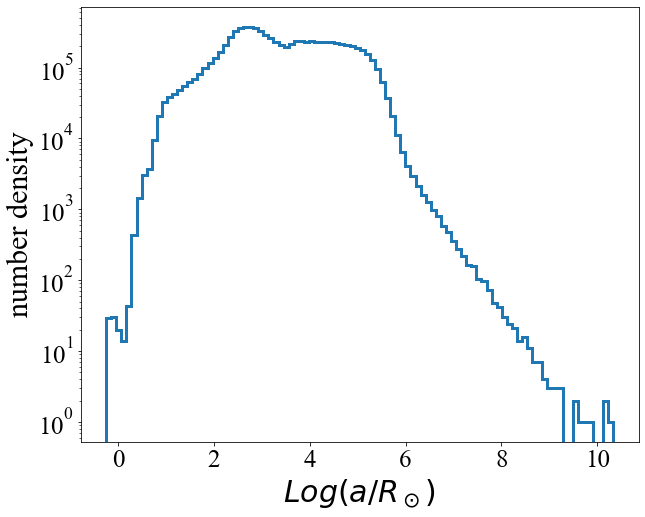

In [21]:
# Semi major axis for BBH 
semilist1=ddf.Semimajor # in meters 
plt.figure(figsize=(10,8))
plt.hist(np.log10(semilist1),histtype='step',lw=3,bins=100)
plt.yscale('log')
plt.xlabel(r'$Log(a/R_\odot)$',fontproperties=font1)
plt.ylabel('number density',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Font family ['STIXSizeFourSym '] not found. Falling back to DejaVu Sans.


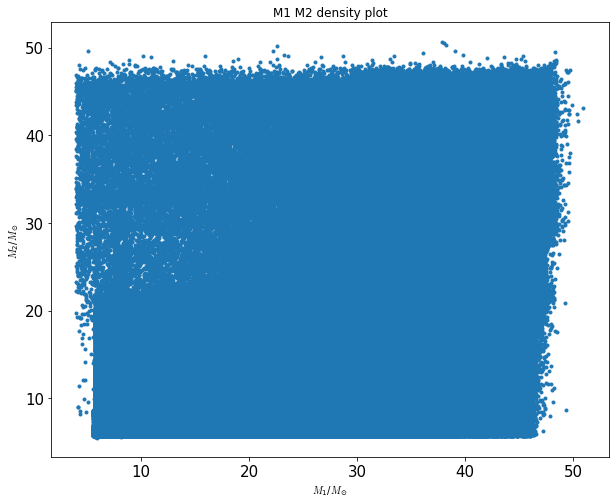

In [26]:
M1=ddf.Mass_0.to_numpy()
M2=ddf.Mass_1.to_numpy()
plt.figure(figsize=(10,8))
plt.plot(M1,M2,'.')
plt.xlabel(r'$M_1/M_\odot$')
plt.ylabel(r'$M_2/M_\odot$')
plt.title('M1 M2 density plot')
plt.show()

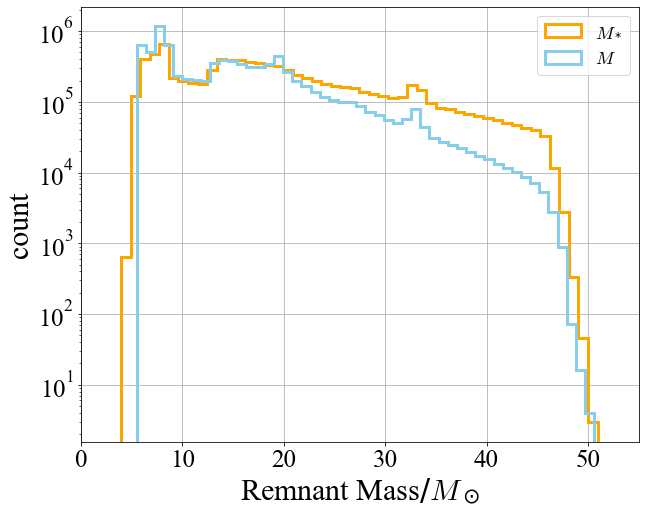

In [37]:
# Plot of mass distribution of primary and secondary remnant

plt.figure(figsize=(10,8))
plt.hist(M1,label='M1',lw=3,bins=50,color='orange',edgecolor='orange',histtype='step')
plt.hist(M2,label='M2',lw=3,bins=50,color='skyblue',edgecolor='skyblue',histtype='step')
plt.legend(['$M_*$','$M$'],fontsize=18)
plt.grid(True)
plt.xlabel(r'Remnant Mass$/M_\odot$',fontproperties=font1)
plt.ylabel('count',fontproperties=font1)
plt.yscale("log")
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.xlim((0,55))
plt.show()

In [43]:
df46.compute()

,ID,name,Mass_0,MHE_0,MCO_0,Radius_0,Luminosity_0,Temperature_0,Phase_0,RemnantType_0,...,MCO_1,Radius_1,Luminosity_1,Temperature_1,Phase_1,RemnantType_1,Semimajor,Eccentricity,BEvent,BWorldtime
7,3,103152336089166,7.931953,0.0,0.0,0.000034,1.000000e-10,3145.556,7,6,...,0.0,0.000016,2.510897e+00,1827252.000,7,5,531.6979,0.741497,0,8.599454
39,1003,763989912603107,42.121250,0.0,0.0,0.000179,1.000000e-10,1365.013,7,6,...,0.0,0.000101,1.000000e-10,1815.561,7,6,57956.8300,0.421265,0,4.744695
77,2006,431710126646235,21.767560,0.0,0.0,0.000092,1.000000e-10,1898.815,7,6,...,0.0,0.000071,1.000000e-10,2164.026,7,6,91692.8800,0.165661,0,3.837144
81,2008,979794414403841,27.347170,0.0,0.0,0.000116,1.000000e-10,1694.070,7,6,...,0.0,0.000111,1.000000e-10,1733.419,7,6,9552.3140,0.797842,0,2.920330
89,2012,782219126280190,20.159560,0.0,0.0,0.000086,1.000000e-10,1973.090,7,6,...,0.0,0.000094,1.000000e-10,1878.683,7,6,64132.9800,0.848934,0,4.793851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433855,27168147,514813890360735,15.058280,0.0,0.0,0.000064,1.000000e-10,2282.968,7,6,...,0.0,0.000050,1.000000e-10,2586.903,7,6,61827.0100,0.102582,0,3.851367
433859,27168149,590894117939818,13.833230,0.0,0.0,0.000059,1.000000e-10,2381.912,7,6,...,0.0,0.000016,2.249976e+00,1777811.000,7,5,147.4831,0.251458,0,17.277440
433871,27168156,408128140588163,40.429440,0.0,0.0,0.000172,1.000000e-10,1393.281,7,6,...,0.0,0.000094,1.000000e-10,1880.715,7,6,53756.3500,0.625161,0,4.576909
433881,27168161,702947174752212,19.734590,0.0,0.0,0.000084,1.000000e-10,1994.222,7,6,...,0.0,0.000086,1.000000e-10,1964.989,7,6,182663.0000,0.529469,0,4.671810


In [44]:
df45.compute()

,ID,name,Mass_0,MHE_0,MCO_0,Radius_0,Luminosity_0,Temperature_0,Phase_0,RemnantType_0,...,MCO_1,Radius_1,Luminosity_1,Temperature_1,Phase_1,RemnantType_1,Semimajor,Eccentricity,BEvent,BWorldtime
39,1003,763989912603107,42.121250,0.0,0.0,0.000179,1.000000e-10,1365.013,7,6,...,0.0,0.000101,1.000000e-10,1815.561,7,6,57956.8300,0.421265,0,4.744695
77,2006,431710126646235,21.767560,0.0,0.0,0.000092,1.000000e-10,1898.815,7,6,...,0.0,0.000071,1.000000e-10,2164.026,7,6,91692.8800,0.165661,0,3.837144
81,2008,979794414403841,27.347170,0.0,0.0,0.000116,1.000000e-10,1694.070,7,6,...,0.0,0.000111,1.000000e-10,1733.419,7,6,9552.3140,0.797842,0,2.920330
89,2012,782219126280190,20.159560,0.0,0.0,0.000086,1.000000e-10,1973.090,7,6,...,0.0,0.000094,1.000000e-10,1878.683,7,6,64132.9800,0.848934,0,4.793851
131,4001,455942085194414,9.207643,0.0,0.0,0.000039,1.000000e-10,2919.532,7,6,...,0.0,0.000080,1.000000e-10,2044.276,7,6,604285.8000,0.991923,0,6.857447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433813,27166156,294322589098475,20.403270,0.0,0.0,0.000087,1.000000e-10,1961.271,7,6,...,0.0,0.000058,1.000000e-10,2401.082,7,6,720.8177,0.014699,0,5.681979
433845,27167158,643527059438176,26.069400,0.0,0.0,0.000111,1.000000e-10,1735.090,7,6,...,0.0,0.000080,1.000000e-10,2037.354,7,6,78073.9500,0.905331,0,4.080352
433855,27168147,514813890360735,15.058280,0.0,0.0,0.000064,1.000000e-10,2282.968,7,6,...,0.0,0.000050,1.000000e-10,2586.903,7,6,61827.0100,0.102582,0,3.851367
433871,27168156,408128140588163,40.429440,0.0,0.0,0.000172,1.000000e-10,1393.281,7,6,...,0.0,0.000094,1.000000e-10,1880.715,7,6,53756.3500,0.625161,0,4.576909


In [28]:
q

array([0.80748512, 0.97968946, 3.28617545, ..., 1.24262833, 0.8018999 ,
       1.12931067])

In [29]:
# MASS RATIO (always larger mass over the lower ==> q >= 1)

q = M1/M2

# semimajor axis in meters
a = ddf.Semimajor * 696340*10**3 # in meters
a_solar =ddf.Semimajor # in solar radius
e =ddf.Eccentricity
a.reset_index(drop=True,inplace=True)
e.reset_index(drop=True,inplace=True)
# adding semi latus rectum 
p = a * (1 - e**2)

# adding the period
DAY=3600 * 24
Mb = M2
Mb_kg = M2*Msun
#T = 2*np.pi*np.sqrt(p**3/(G * Mb*(1+q)*(1-e**2)**3)) # in seconds
T = 2*np.pi*np.sqrt(p**3/(G * Mb_kg*(1+q)*(1-e**2)**3)) # in seconds
T = T / DAY                                    # in days
T = np.array(T)

at=model(Mb,T,state='he_depletion')


In [22]:
#########################
# MODELLING THE BH SPIN #
#########################
def model(m_WR,T,state='c_depletion'): 
    '''modelling the spin of the black hole assuming that it is forming from a WR star (Equation 5)
    INPUT:
        m_WR = mass of the Wolf Rayet star (can be approximanted with the BH)
        T = period in days
        state = c_deplation/He_deplation change slightly the parameters
    OUTPUT:
        spin of the black hole'''
    if state == 'c_depletion':
        c1a = 0.051237
        c2a = 0.029928
        c3a = 0.282998
        c1b = 0.027090
        c2b = 0.010905
        c3b = 0.422213
    elif state == 'he_depletion':
        c1a = 0.059305
        c2a = 0.035552
        c3a = 0.270245
        c1b = 0.026960
        c2b = 0.011001
        c3b = 0.420739
    else:
        raise ValueError('state not supported!')
    
    #a_BH2(T >= 1.) = 0 
    a_BH2 = np.zeros(len(T))
    
    def constant(m_WR, c1, c2, c3):
        return -c1/(c2+np.exp(-c3*m_WR))
    
    alpha = constant(m_WR[(0.1<=T)&(T<1.)] , c1a, c2a, c3a)
    beta = constant(m_WR[(0.1<=T)&(T<1.)] , c1b, c2b, c3b)
    a_BH2[(0.1<=T)&(T<1.)] = alpha*np.log10(T[(0.1<=T)&(T<1.)])**2+beta*np.log10(T[(0.1<=T)&(T<1.)])
    a_BH2[T<0.1] = constant(m_WR[T<0.1] , c1a, c2a, c3a)-constant(m_WR[T<0.1] , c1b, c2b, c3b)
    
    return a_BH2

In [23]:
def tmerge(semi,BHMass,q):
    length=len(semi)
    table=[max(1/((5/256)*(c**5/(G**3))* ((semi[i]* 696340*10**3)**4/((BHMass[i]*2e30)**3 *q[i]*(1+q[i])))),1e-17) for i in range(length)]
    return table

In [24]:
def tmergenew(semi,BHMass,q):
    
    tm=(5/256)*(c**5/(G**3))* ((semi* 696340*10**3)**4/((BHMass*2e30)**3 *q*(1+q)))
    if tm>1e-17:
        return 1e-17
    else:
        return 1/tm

In [38]:
tmergenew(semi=a_solar.array[2],BHMass=Mb[2],q=q[2])

1e-17

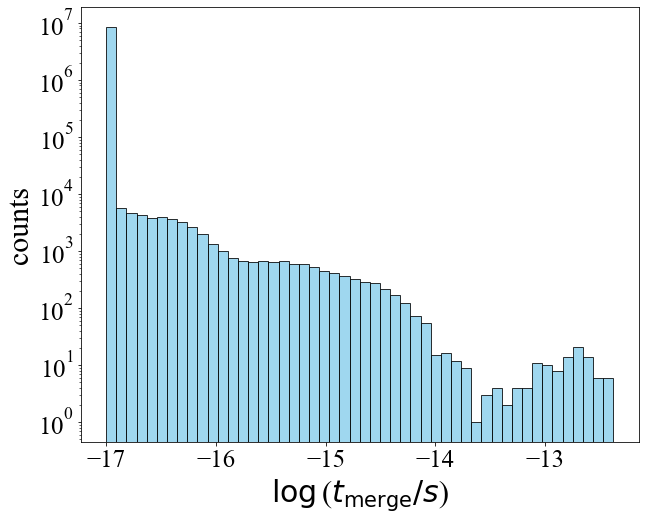

In [43]:
ttest=tmerged(semi=a_solar.array,BHMass=Mb,q=q)
plt.figure(figsize=(10,8))
plt.hist(np.log10(ttest),bins=50,edgecolor='k',color='skyblue',alpha=0.8)
plt.yscale('log')
plt.xlabel(r'$\log$($t_{\rm merge}/s$)',fontproperties=font1)
plt.ylabel('counts',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

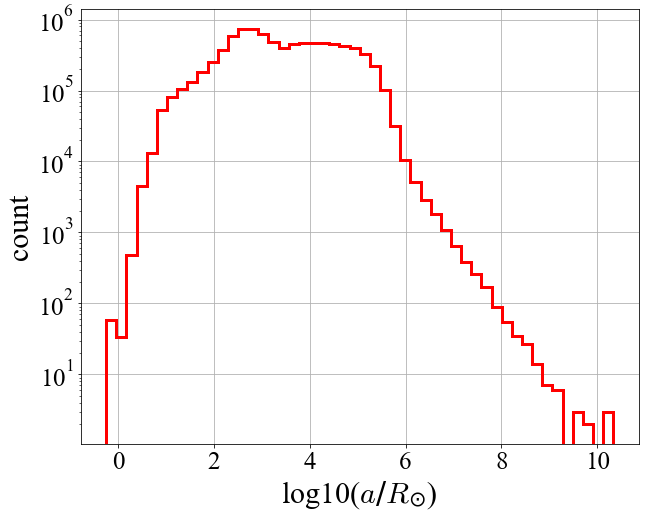

In [81]:
plt.figure(figsize=(10,8))
plt.hist(np.log10(a_solar),lw=3,bins=50,edgecolor='red',histtype='step')
plt.yscale('log')
plt.grid(True)
plt.xlabel(r'log10'+'('+'$a/R_{\odot}$'+')',fontproperties=font1)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

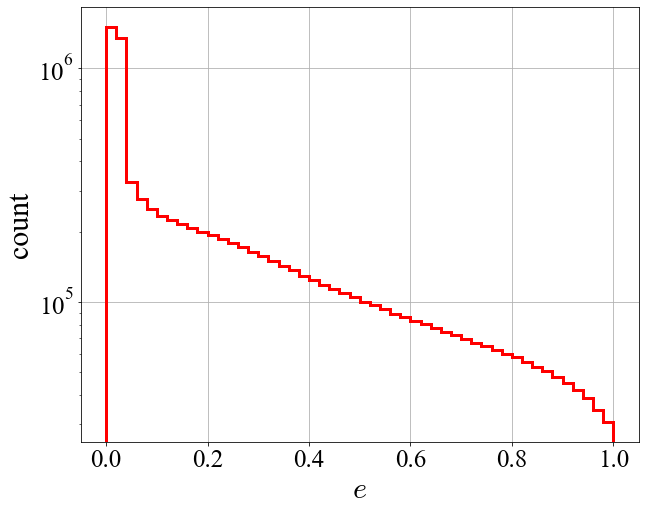

In [40]:
plt.figure(figsize=(10,8))
plt.hist(ddf.Eccentricity,lw=3,bins=50,edgecolor='red',histtype='step')
plt.yscale('log')
plt.grid(True)
plt.xlabel(r'$e$',fontproperties=font1)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

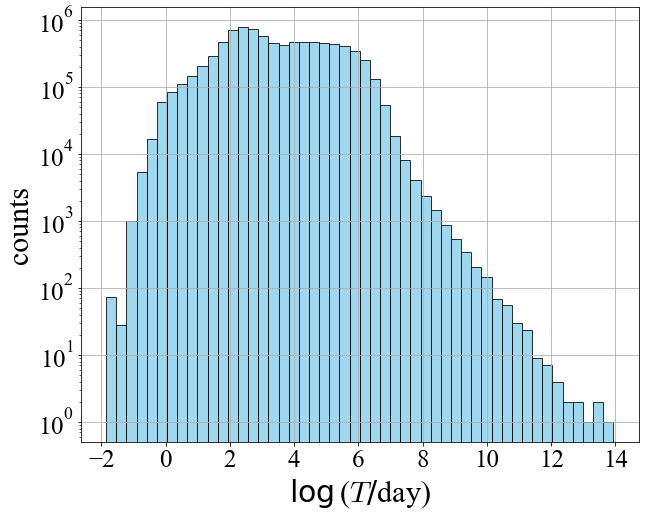

In [418]:
plt.figure(figsize=(10,8))
plt.hist(np.log10(T),bins=50,edgecolor='k',color='skyblue',alpha=0.8)
plt.yscale('log')
plt.xlabel(r'$\log$($T/$day)',fontproperties=font1)
plt.ylabel('counts',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

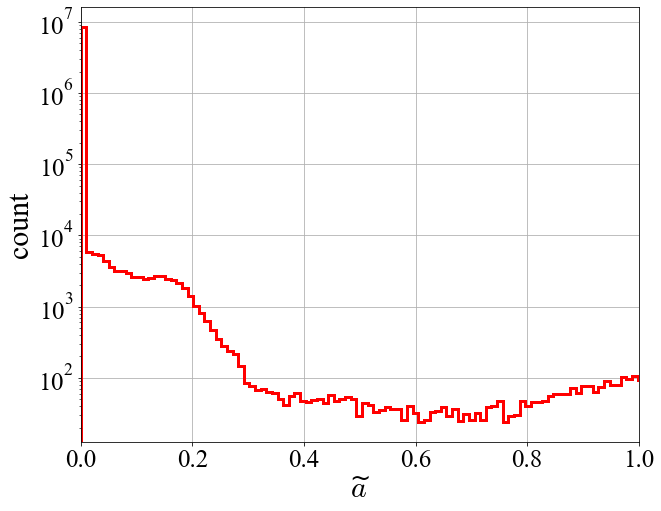

In [100]:
#plt.title('BH Spin for WR Model')
plt.figure(figsize=(10,8))
plt.xlim((0,1))
plt.yscale('log')
plt.hist(at,lw=3,bins=100,edgecolor='red',histtype='step')
plt.grid(True)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.xlabel('$\widetilde{a}$',fontproperties=font1)
plt.ylabel('count',fontproperties=font1)
plt.show()

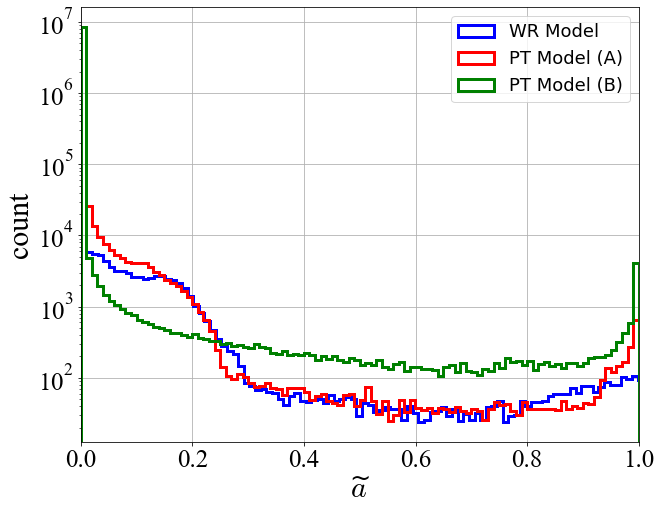

In [112]:
#plt.title('BH Spin for PT Model')
atPT=ourspin(T,Mb,0.8,10,0.5,2)
atPT1=ourspin(T,Mb,0.4,5,0.25,1)
plt.figure(figsize=(10,8))
plt.xlim((0,1))
plt.yscale('log')
plt.hist(at,lw=3,bins=100,edgecolor='blue',histtype='step',label='WR Model')
plt.hist(atPT,lw=3,bins=100,edgecolor='red',histtype='step',label='PT Model (A)')
plt.hist(atPT1,lw=3,bins=100,edgecolor='green',histtype='step',label='PT Model (B)')
plt.grid(True)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.xlabel('$\widetilde{a}$',fontproperties=font1)
plt.ylabel('count',fontproperties=font1)
plt.legend(fontsize=18)
plt.show()

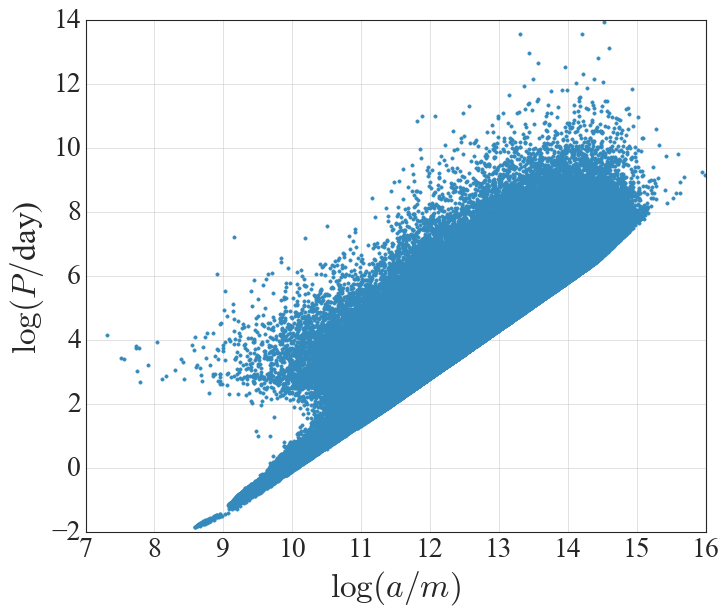

In [1267]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(p.to_numpy()),np.log10(T),".")
plt.xlabel('$\log(a/m)$',fontproperties=font1)
plt.ylabel('$\log(P/$day)',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

In [1269]:
q

array([0.80748512, 0.97968946, 3.28617545, ..., 1.24262833, 0.8018999 ,
       1.12931067])

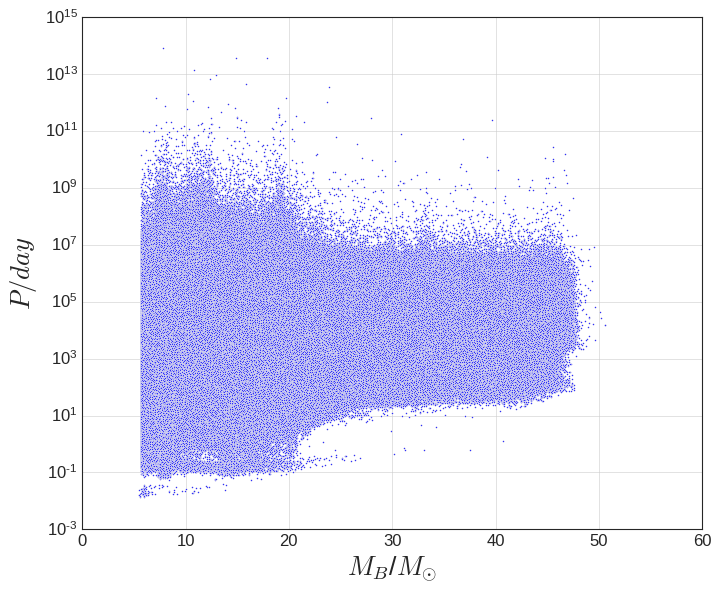

In [1352]:
plt.figure(figsize=(10,8))
plt.scatter(Mb, T,s=2)
plt.yscale('log')
plt.xlabel('$M_B$/$M_{\odot}$')
plt.ylabel('$P/day$')
plt.show()

<ipython-input-1133-fd73cd4e1adb>:19: RuntimeWarning: invalid value encountered in sqrt
  gamma = c**3 * (8 * alpha**13 * (1 + np.sqrt(1 - at**2)) * (-alpha + alpha**3 / 18. + (23 * alpha**5)/1080. - (1.6e10 * alpha**6 * at) / 1.620000000081e12 + at / (1 + np.sqrt(1 - at**2))) * (4 - 4 * at**2 + (2 * at - 2 * alpha * (1 + np.sqrt(1 - at**2)))**2) * (1 - at**2 + (2 * at - 2 * alpha * (1 + np.sqrt(1 - at**2)))**2)) / (885735. * s.G * Mb)
<ipython-input-1576-a466e09c852e>:2: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(GAMMA_322(at,Mb,mu=1.34e-12,verbose=False)),bins=100)


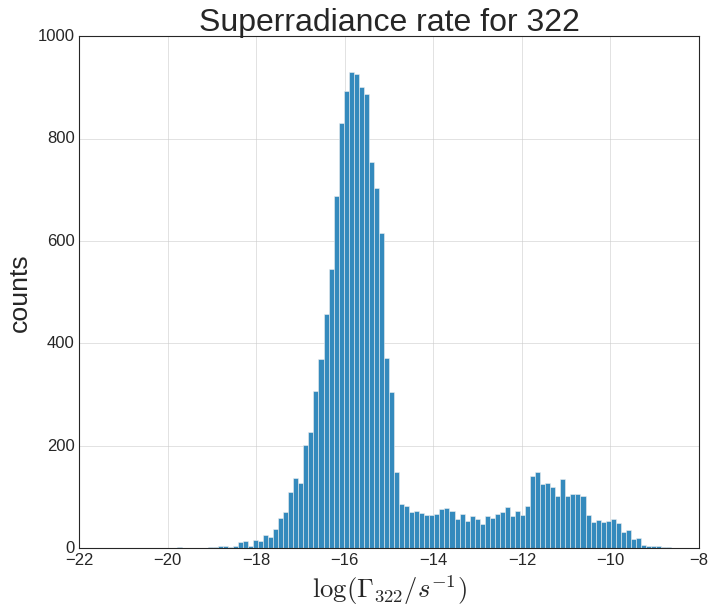

In [1576]:
plt.figure(figsize=(10,8))
plt.hist(np.log10(GAMMA_322(at,Mb,mu=1.34e-12,verbose=False)),bins=100)
plt.xlabel(r'$\log(\Gamma_{322}/s^{-1})$')
plt.ylabel('counts')
plt.title('Superradiance rate for 322')
plt.show()

# Spin Model Plot

In [31]:
x = np.linspace(0,55,200)
y = np.linspace(-2, 14,200)
X,Y=np.meshgrid(x,y)
Z=modelnew(X,Y)*(Y<0)*(Y>-1)+modelnew(X,-1)*(Y<=-1)

In [32]:
# 统一设置字体
plt.rcParams["font.family"] = 'DejaVu Sans'
 
# 分别设置mathtext公式的正体和斜体字体
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'STIXSizeFourSym '
matplotlib.rcParams['mathtext.it'] ='STIXSizeFourSym'  


In [19]:
matplotlib.rcParams['text.usetex'] = False

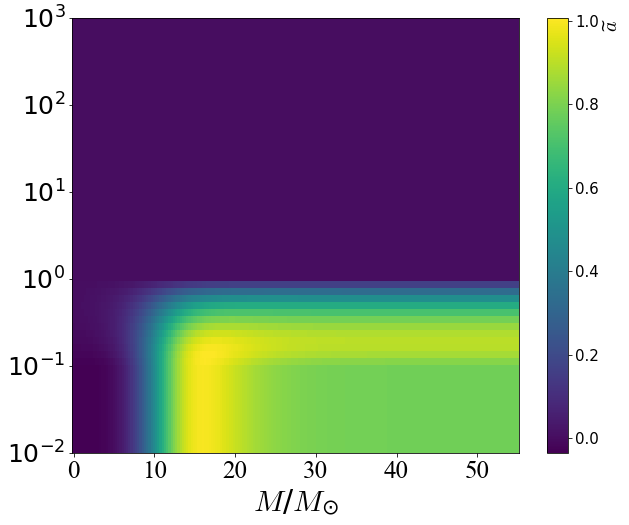

In [44]:
plt.figure(figsize=(10,8))
plt.xlabel('$\mathit{M/M_{\odot}}$',size=30)
plt.pcolormesh(X, Y, Z,cmap='viridis')
cb1=plt.colorbar(ticks=np.linspace(0, 1,6))
cb1.set_label('$\widetilde{a}$',loc='top',fontsize=20)
cb1.ax.tick_params(labelsize=15)
plt.ylim((-2,3))
plt.xticks(fontproperties=font2)
plt.yticks([-2,-1,0,1,2,3],['$10^{-2}$','$10^{-1}$','$10^{0}$','$10^{1}$','$10^{2}$','$10^{3}$'],fontproperties=font2)
matplotlib.pyplot.grid(False)
plt.show()

<ipython-input-67-2e0081de567a>:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1000))


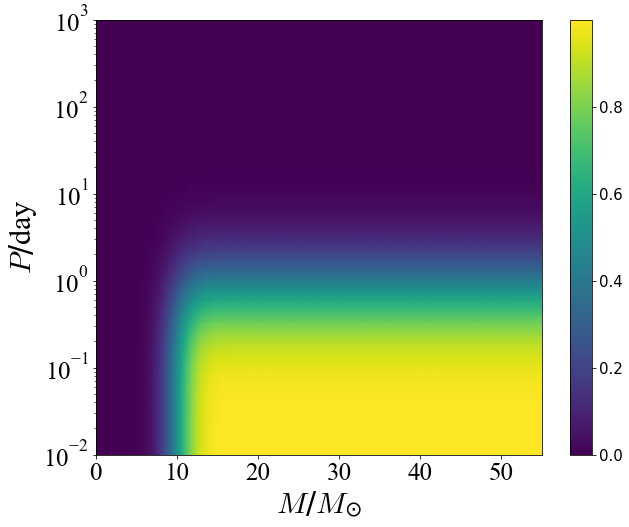

In [67]:
Z1=(1/4)* special.erfc(np.log10(10**Y/0.8)/(np.sqrt(2)*0.5)) * special.erfc((10-X)/(np.sqrt(2)*2))

plt.figure(figsize=(10,8))
plt.xlabel('$M/M_{\odot}$',size=30)
plt.ylabel('$P/$'+'day',size=30,fontproperties=font2)
ax=plt.pcolormesh(X, 10**Y, Z1,cmap='viridis',shading='gouraud')
plt.yscale('log')
plt.ylim((0,1000))
cb1=plt.colorbar(ticks=np.linspace(0, 1,6))
cb1.ax.tick_params(labelsize=15)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
matplotlib.pyplot.grid(False)
plt.show()

# Dask & Participant vs Survivor 

In [45]:
mulist=1e-13*np.array([1.03**i for i in range(200)])
mulist

array([1.00000000e-13, 1.03000000e-13, 1.06090000e-13, 1.09272700e-13,
       1.12550881e-13, 1.15927407e-13, 1.19405230e-13, 1.22987387e-13,
       1.26677008e-13, 1.30477318e-13, 1.34391638e-13, 1.38423387e-13,
       1.42576089e-13, 1.46853371e-13, 1.51258972e-13, 1.55796742e-13,
       1.60470644e-13, 1.65284763e-13, 1.70243306e-13, 1.75350605e-13,
       1.80611123e-13, 1.86029457e-13, 1.91610341e-13, 1.97358651e-13,
       2.03279411e-13, 2.09377793e-13, 2.15659127e-13, 2.22128901e-13,
       2.28792768e-13, 2.35656551e-13, 2.42726247e-13, 2.50008035e-13,
       2.57508276e-13, 2.65233524e-13, 2.73190530e-13, 2.81386245e-13,
       2.89827833e-13, 2.98522668e-13, 3.07478348e-13, 3.16702698e-13,
       3.26203779e-13, 3.35989893e-13, 3.46069589e-13, 3.56451677e-13,
       3.67145227e-13, 3.78159584e-13, 3.89504372e-13, 4.01189503e-13,
       4.13225188e-13, 4.25621944e-13, 4.38390602e-13, 4.51542320e-13,
       4.65088590e-13, 4.79041247e-13, 4.93412485e-13, 5.08214859e-13,
      

In [46]:
def tmerged(semi,BHMass,q):
    table=(8/3)*(5/256)*(c**5/(G**3))* ((semi* Rsun)**4/((BHMass*Msun)**3 *q*(1+q)))
    judge=table>1e17
    OneOverTime=1e-17*judge-(judge-1)*(1/table)
    return OneOverTime

In [47]:
DaskMb=da.from_array(Mb,chunks=1e5)
Dasksemi=da.from_array(a_solar.to_numpy(),chunks=1e5)
Daskq=da.from_array(q,chunks=1e5)
Daskat=da.from_array(at,chunks=1e5)
Daskmulist=da.from_array(mulist,chunks=1e5)
Daske=da.from_array(ddf.Eccentricity.to_numpy(),chunks=1e5)

In [48]:
cuttimed=tmerged(semi=Dasksemi,BHMass=DaskMb,q=Daskq).compute()
cuttime=tmerged(semi=Dasksemi,BHMass=DaskMb,q=Daskq)

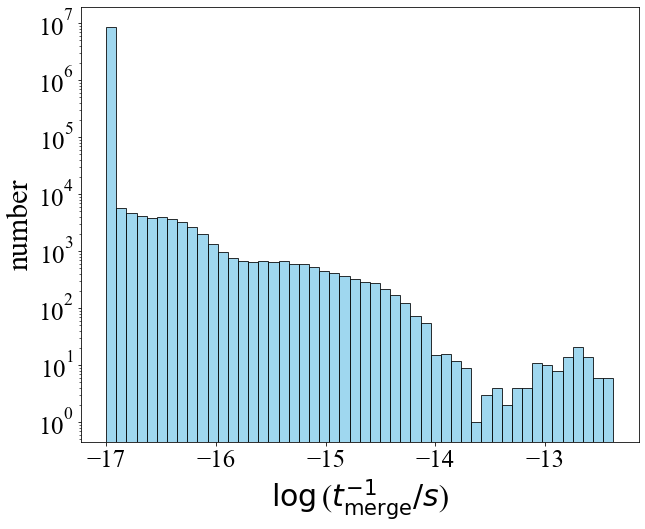

In [35]:
plt.figure(figsize=(10,8))
plt.hist(np.log10(cuttimed),bins=50,edgecolor='k',color='skyblue',alpha=0.8)
plt.yscale('log')
plt.xlabel(r'$\log$($t_{\rm merge}^{-1}/s$)',fontproperties=font1)
plt.ylabel('number',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

In [49]:
#Survival Rate Function Using Dask
def RateOfSurvive_322d(BHspin,BHmass,mumass,Massratio,ecc,semimajor,cut):

    #mumass should be in eV
    
    #superradiance rate bigger than one over the threashold time (Return True or False list)
    sel_cand_1 = GAMMA_322(at=BHspin,Mb=BHmass,mu=mumass,verbose=False)-cut>0
    #alpha<0.4 (Return another True or False list)
    sel_cand_2 = G*BHmass * Msun * mumass *eVtokg /(c * hbar )<0.4
    #Only two condition True together can be True (Return True or False list)
    sel_part_322 = sel_cand_1 * sel_cand_2
    #Delta Gamma<Gamma (Return True or False list)
    sel_surv_322=-DELTA_GAMMA_ACR_322(e=ecc,Mb=BHmass,q=Massratio,a=semimajor,at=BHspin,mu = mumass,verbose=False)/GAMMA_322(at=BHspin,Mb=BHmass,mu=mumass,verbose=False)<1
    
    #Survival for 322 (Need Delta Gamma<Gamma and it should be a participant)
    SurviveOrNot322 = sel_part_322 * sel_surv_322
    
    return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()


#Error Bar Function Using Dask
def ErrorBar_322d(BHspin,BHmass,mumass,Massratio,ecc,semimajor,cut):

    #mumass should be in eV
    sel_cand_1 = GAMMA_322(at=BHspin,Mb=BHmass,mu=mumass,verbose=False)-cut>0 
    sel_cand_2 = G*BHmass * Msun * mumass *eVtokg /(c * hbar )<0.4
    
    sel_part_322 = sel_cand_1 * sel_cand_2
            
    errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
    
    return errorbar


#Check single point 
#Error Bar Function Using Dask
def CheckPoint_322d(BHspin,BHmass,mumass,Massratio,ecc,semimajor,cut):

    #mumass should be in eV
    sel_cand_1 = GAMMA_322(at=BHspin,Mb=BHmass,mu=mumass,verbose=False)-cut>0 
    sel_cand_2 = G*BHmass * Msun * mumass *eVtokg /(c * hbar )<0.4
    
    sel_part_322 = sel_cand_1 * sel_cand_2
    
    sel_surv_322=-DELTA_GAMMA_ACR_322(e=ecc,Mb=BHmass,q=Massratio,a=semimajor,at=BHspin,mu = mumass,verbose=False)/GAMMA_322(at=BHspin,Mb=BHmass,mu=mumass,verbose=False)<1
    SurviveOrNot322 = sel_part_322 * sel_surv_322
    
            
    print('322 Participant:',da.sum(sel_part_322).compute())
    print('322 Survivor:',da.sum(SurviveOrNot322).compute())

In [50]:
Ratelistd=[RateOfSurvive_322d(BHspin=Daskat,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord=[ErrorBar_322d(BHspin=Daskat,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a,

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_tas

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a,

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a,

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a,

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a,

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b

In [61]:
error1=np.array(Ratelistd)+(np.array(Errord))
error2=np.array(Ratelistd)-(np.array(Errord))
error21=np.array(Ratelistd2)+(np.array(Errord2))
error22=np.array(Ratelistd2)-(np.array(Errord2))
error31=np.array(Ratelistd3)+(np.array(Errord3))
error32=np.array(Ratelistd3)-(np.array(Errord3))
error41=np.array(Ratelistd4)+(np.array(Errord4))
error42=np.array(Ratelistd4)-(np.array(Errord4))
error51=np.array(Ratelistd5)+(np.array(Errord5))
error52=np.array(Ratelistd5)-(np.array(Errord5))
error61=np.array(Ratelistd6)+(np.array(Errord6))
error62=np.array(Ratelistd6)-(np.array(Errord6))
error71=np.array(Ratelistd7)+(np.array(Errord7))
error72=np.array(Ratelistd7)-(np.array(Errord7))
error81=np.array(Ratelistd8)+(np.array(Errord8))
error82=np.array(Ratelistd8)-(np.array(Errord8))
error91=np.array(Ratelistd9)+(np.array(Errord9))
error92=np.array(Ratelistd9)-(np.array(Errord9))
error101=np.array(Ratelistd10)+(np.array(Errord10))
error102=np.array(Ratelistd10)-(np.array(Errord10))

<Figure size 720x576 with 0 Axes>

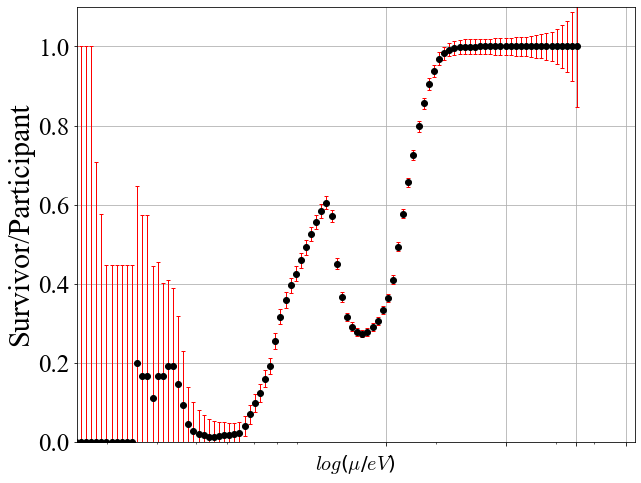

In [371]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.grid'] = True
plt.rcParams['image.cmap'] = 'gray'
plt.figure(figsize=(10,8))
plt.errorbar(mulist,Ratelistd,yerr=Errord,fmt='o',ecolor='r',color='k',elinewidth=1,capsize=2)
plt.xscale('log')
plt.ylim((0,1.1))
plt.xlim((10**(-12.6),10**(-11.2)))
plt.ylabel('Survivor/Participant',fontproperties=font1)
plt.xlabel('$log(\mu/eV)$')
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
#plt.rcParams['axes.linewidth'] = 1.0
ax=plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()

<Figure size 720x576 with 0 Axes>

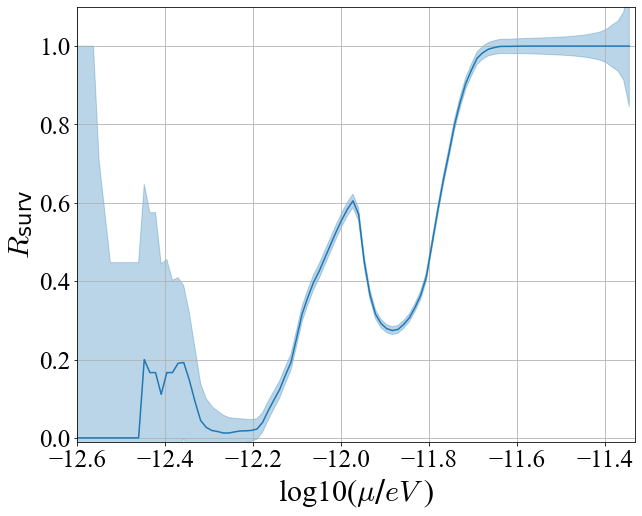

In [80]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.grid'] = True
plt.rcParams['image.cmap'] = 'gray'
plt.figure(figsize=(10,8))
plt.plot(np.log10(mulist),Ratelistd,color='C0')
plt.fill_between( np.log10(mulist),y1=error1, y2=error2, color='C0', alpha=0.3)
plt.ylim((-0.01,1.1))
plt.xlim((-12.6,-11.33))
plt.ylabel('$R_{\mathrm{surv}}$',fontproperties=font1)
plt.xlabel('log10('+'$\mu/eV$'+' )',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

In [62]:
Gamma322List=GAMMA_322(Daskat,DaskMb,mu = 1.34e-12,verbose=False).compute()
DeltaGamma322List=DELTA_GAMMA_ACR_322(Daske,DaskMb,Daskq,Dasksemi,Daskat,mu = 1.34e-12,verbose=False).compute()
Gamma211List=GAMMA_211(Daskat,DaskMb,mu = 1.34e-12,verbose=False).compute()
DeltaGamma211List=DELTA_GAMMA_ACR_211(Daske,DaskMb,Daskq,Dasksemi,Daskat,mu = 1.34e-12,verbose=False).compute()

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))


In [32]:
GAMMA_322(at,Mb,mu=1.34e-12,verbose=False)

<ipython-input-4-96f5a52333f6>:19: RuntimeWarning: invalid value encountered in sqrt
  gamma = c**3 * (8 * alpha**13 * (1 + np.sqrt(1 - at**2)) * (-alpha + alpha**3 / 18. + (23 * alpha**5)/1080. - (1.6e10 * alpha**6 * at) / 1.620000000081e12 + at / (1 + np.sqrt(1 - at**2))) * (4 - 4 * at**2 + (2 * at - 2 * alpha * (1 + np.sqrt(1 - at**2)))**2) * (1 - at**2 + (2 * at - 2 * alpha * (1 + np.sqrt(1 - at**2)))**2)) / (885735. * s.G * Mb)


array([-2.40767858e-11, -1.20549248e-10, -1.31043502e-12, ...,
       -1.66461964e-08, -5.56906753e-16, -9.01572753e-08])

In [52]:
len(DeltaGamma322List)

8602947

<ipython-input-33-0531be2410f5>:2: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(Gamma322List),np.log10(-DeltaGamma322List),s=2)
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Font family ['STIXSizeFourSym '] not found. Falling back to DejaVu Sans.


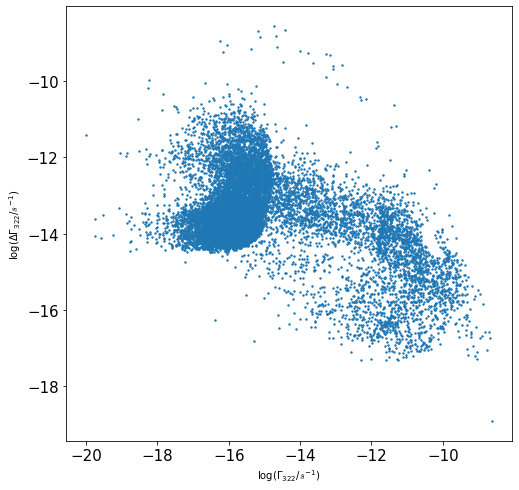

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(np.log10(Gamma322List),np.log10(-DeltaGamma322List),s=2)
plt.xlabel('$\log(\Gamma_{322}/s^{-1})$')
plt.ylabel('$\log(\Delta\Gamma_{322}/s^{-1})$')
plt.show()

In [1331]:
CheckPoint_322d(BHspin=Daskat,BHmass=DaskMb,mumass=1.34e-12,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime)

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))


322 Participant: 3726


/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))


322 Survivor: 2197


In [63]:
test1=Gamma322List-cuttimed>0
test2=G*Mb * 2e30 * 1.34e-12 *1.78e-36 /(c * hbar )<0.4
test=test1 * test2 
np.sum(test)

10209

In [64]:
test3=Gamma211List-cuttimed>0
test2=G*Mb * 2e30 * 1.34e-12 *1.78e-36 /(c * hbar )<0.4
test211=test3 * test2 
np.sum(test211)

2666

In [65]:
at2=ourspin(period=T,BHmass=Mb,p0=0.8,M0=10,wp=0.5,wm=2)
Daskat2=da.from_array(at2,chunks=1e5)
Gamma322ListPT=GAMMA_322(Daskat2,DaskMb,mu = 1.34e-12,verbose=False).compute()
DeltaGamma322ListPT=DELTA_GAMMA_ACR_322(Daske,DaskMb,Daskq,Dasksemi,Daskat2,mu = 1.34e-12,verbose=False).compute()
Gamma211ListPT=GAMMA_211(Daskat2,DaskMb,mu = 1.34e-12,verbose=False).compute()
DeltaGamma211ListPT=DELTA_GAMMA_ACR_211(Daske,DaskMb,Daskq,Dasksemi,Daskat2,mu = 1.34e-12,verbose=False).compute()

In [66]:
test1PT=Gamma322ListPT-cuttimed>0
test2=G*Mb * 2e30 * 1.34e-12 *1.78e-36 /(c * hbar )<0.4
testPT=test1PT * test2 
np.sum(testPT)

11043

In [67]:
test3PT=Gamma211ListPT-cuttimed>0
test2=G*Mb * 2e30 * 1.34e-12 *1.78e-36 /(c * hbar )<0.4
test211PT=test3PT * test2 
np.sum(test211PT)

3477

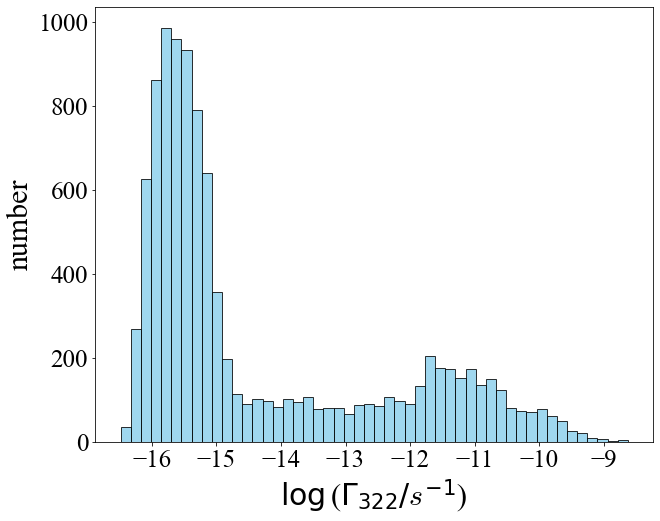

In [68]:
testGamma=test * Gamma322List 
plt.figure(figsize=(10,8))
plt.hist(np.log10(testGamma[testGamma>0]),bins=50,edgecolor='k',color='skyblue',alpha=0.8)
plt.xlabel(r'$\log$($\Gamma_{322}/s^{-1}$)',fontproperties=font1)
plt.ylabel('number',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

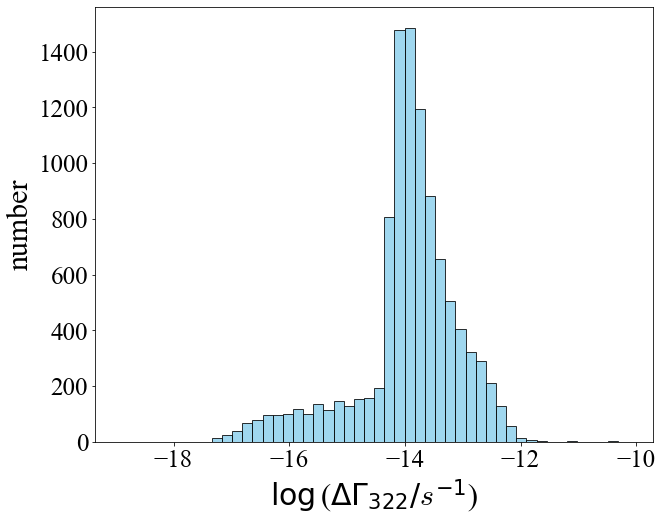

In [69]:
testDelta=test * DeltaGamma322List 
plt.figure(figsize=(10,8))
plt.hist(np.log10(-testDelta[testDelta<0]),bins=50,edgecolor='k',color='skyblue',alpha=0.8)
plt.xlabel(r'$\log$($\Delta\Gamma_{322}/s^{-1}$)',fontproperties=font1)
plt.ylabel('number',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

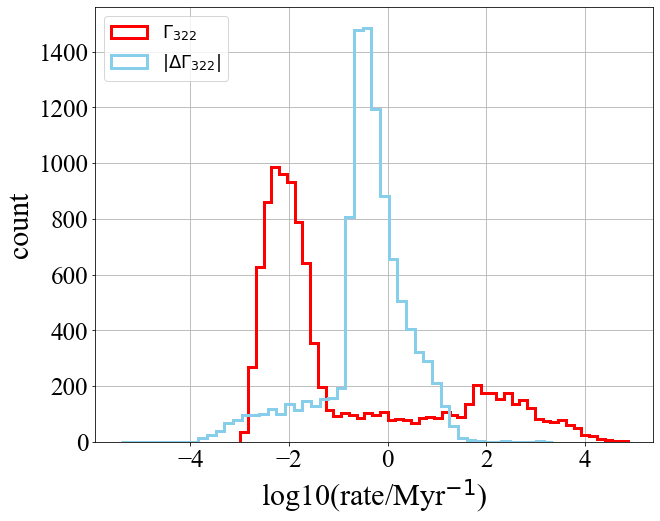

In [82]:
plt.figure(figsize=(10,8))
plt.hist(np.log10(testGamma[testGamma>0]*Myr),bins=50,lw=3,edgecolor='red',histtype='step')
plt.hist(np.log10(-testDelta[testDelta<0]*Myr),bins=50,lw=3,edgecolor='skyblue',histtype='step')
plt.legend(['$\Gamma_{322}$','$|\Delta\Gamma_{322}|$'],fontsize=18,loc='upper left')
plt.xlabel('log10(rate/Myr'+'${}^{-1}$'+')',fontproperties=font1)
plt.grid(True)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

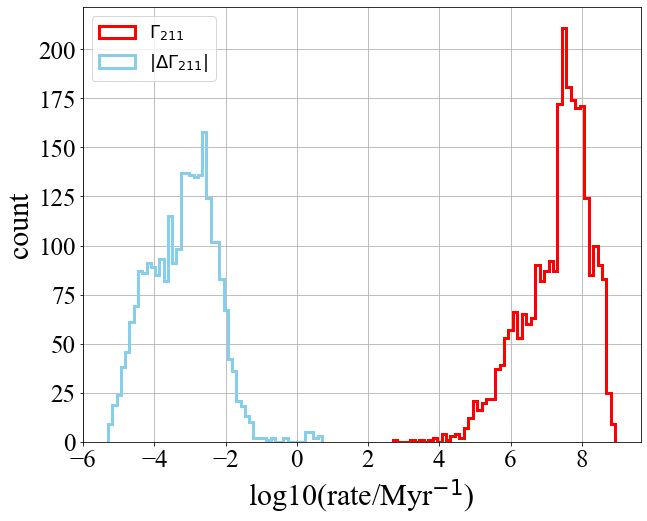

In [83]:
testGamma211=test211 * Gamma211List 
testDelta211=test211 * DeltaGamma211List 
plt.figure(figsize=(10,8))
plt.hist(np.log10(testGamma211[testGamma211>0]*Myr),bins=50,lw=3,edgecolor='red',histtype='step')
plt.hist(np.log10(-testDelta211[testDelta211<0]*Myr),bins=50,lw=3,edgecolor='skyblue',histtype='step')
plt.legend(['$\Gamma_{211}$','$|\Delta\Gamma_{211}|$'],fontsize=18)
plt.xlabel('log10(rate/Myr'+'${}^{-1}$'+')',fontproperties=font1)
plt.grid(True)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

For PT Model

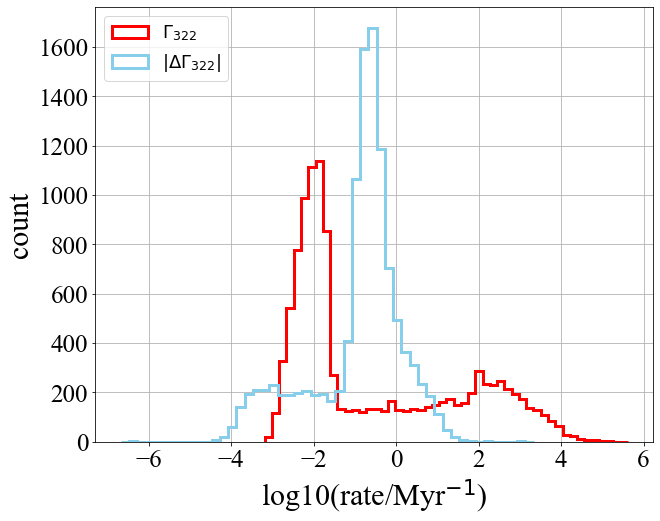

In [84]:
testGamma322PT=testPT * Gamma322ListPT 
testDelta322PT=testPT * DeltaGamma322ListPT 
plt.figure(figsize=(10,8))
plt.hist(np.log10(testGamma322PT[testGamma322PT>0]*Myr),bins=50,lw=3,edgecolor='red',histtype='step')
plt.hist(np.log10(-testDelta322PT[testDelta322PT<0]*Myr),bins=50,lw=3,edgecolor='skyblue',histtype='step')
plt.legend(['$\Gamma_{322}$','$|\Delta\Gamma_{322}|$'],fontsize=18,loc='upper left')
plt.xlabel('log10(rate/Myr'+'${}^{-1}$'+')',fontproperties=font1)
plt.grid(True)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

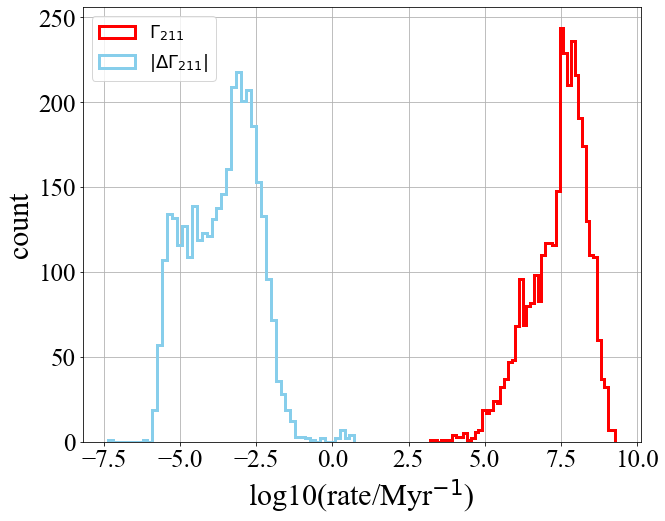

In [85]:
testGamma211PT=test211PT * Gamma211ListPT 
testDelta211PT=test211PT * DeltaGamma211ListPT 
plt.figure(figsize=(10,8))
plt.hist(np.log10(testGamma211PT[testGamma211PT>0]*Myr),bins=50,lw=3,edgecolor='red',histtype='step')
plt.hist(np.log10(-testDelta211PT[testDelta211PT<0]*Myr),bins=50,lw=3,edgecolor='skyblue',histtype='step')
plt.legend(['$\Gamma_{211}$','$|\Delta\Gamma_{211}|$'],fontsize=18)
plt.xlabel('log10(rate/Myr'+'${}^{-1}$'+')',fontproperties=font1)
plt.grid(True)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

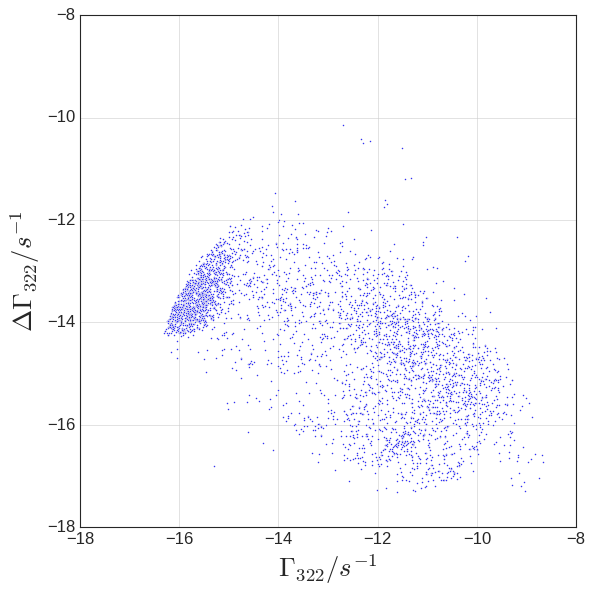

In [1353]:
plt.figure(figsize=(8,8))
plt.scatter(np.log10(testGamma[testGamma>0]), np.log10(-testDelta[testDelta<0]),s=2)
plt.xlim((-18,-8))
plt.ylim((-18,-8))
plt.xlabel('$\Gamma_{322}/s^{-1}$')
plt.ylabel('$\Delta\Gamma_{322}/s^{-1}$')
plt.show()

# For Our Spin Model 

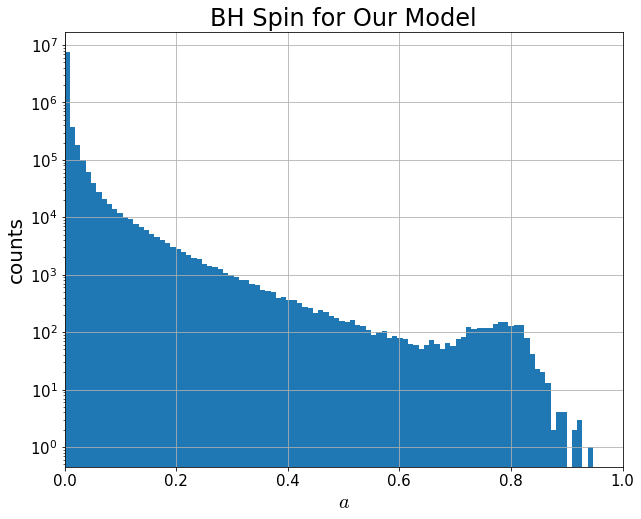

In [346]:
at1=ourspin(period=T,BHmass=Mb,p0=1,M0=10,wp=1,wm=1)
Daskat1=da.from_array(at1,chunks=1e5)
plt.figure(figsize=(10,8))
plt.xlim((0,1))
plt.yscale('log')
plt.hist(at1,bins=100)
plt.xlabel('$a$')
plt.ylabel('counts')
plt.title('BH Spin for Our Model')
plt.show()

In [51]:
Ratelistd1=[RateOfSurvive_322d(BHspin=Daskat1,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord1=[ErrorBar_322d(BHspin=Daskat1,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

NameError: name 'Daskat1' is not defined

<Figure size 800x640 with 0 Axes>

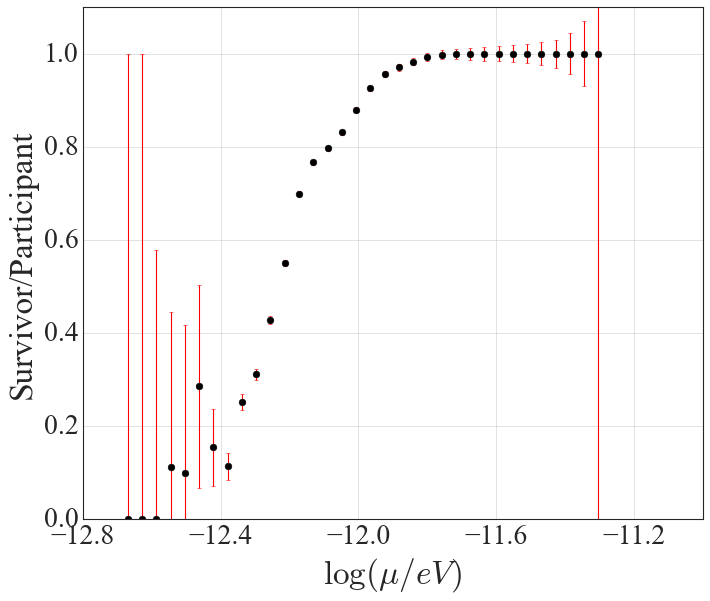

In [1338]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.grid'] = True
plt.rcParams['image.cmap'] = 'gray'
plt.figure(figsize=(10,8))
plt.errorbar(np.log10(mulist),Ratelistd1,yerr=Errord1,fmt='o',ecolor='r',color='k',elinewidth=1,capsize=2)
#plt.xscale('log')
plt.ylim((0,1.1))
plt.xlim((-12.8,-11))
plt.ylabel('Survivor/Participant',fontproperties=font1)
plt.xlabel('$\log(\mu/eV)$',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
#plt.rcParams['axes.linewidth'] = 1.0
ax=plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()

In [52]:
at2=ourspin(period=T,BHmass=Mb,p0=0.8,M0=10,wp=0.5,wm=2)
Daskat2=da.from_array(at2,chunks=1e5)
Ratelistd2=[RateOfSurvive_322d(BHspin=Daskat2,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord2=[ErrorBar_322d(BHspin=Daskat2,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).co

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cac

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: 

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

In [53]:
at3=ourspin(period=T,BHmass=Mb,p0=0.4,M0=10,wp=0.5,wm=2)
Daskat3=da.from_array(at3,chunks=1e5)
Ratelistd3=[RateOfSurvive_322d(BHspin=Daskat3,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord3=[ErrorBar_322d(BHspin=Daskat3,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).co

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cac

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

In [54]:
at10=ourspin(period=T,BHmass=Mb,p0=1.6,M0=10,wp=0.5,wm=2)
Daskat10=da.from_array(at10,chunks=1e5)
Ratelistd10=[RateOfSurvive_322d(BHspin=Daskat10,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord10=[ErrorBar_322d(BHspin=Daskat10,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).co

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cac

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

In [55]:
at4=ourspin(period=T,BHmass=Mb,p0=0.8,M0=5,wp=0.5,wm=2)
Daskat4=da.from_array(at4,chunks=1e5)
Ratelistd4=[RateOfSurvive_322d(BHspin=Daskat4,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord4=[ErrorBar_322d(BHspin=Daskat4,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).co

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cac

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))


In [56]:
at5=ourspin(period=T,BHmass=Mb,p0=0.8,M0=15,wp=0.5,wm=2)
Daskat5=da.from_array(at5,chunks=1e5)
Ratelistd5=[RateOfSurvive_322d(BHspin=Daskat5,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord5=[ErrorBar_322d(BHspin=Daskat5,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).co

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).co

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cac

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

In [57]:
at6=ourspin(period=T,BHmass=Mb,p0=0.8,M0=10,wp=0.5,wm=1)
Daskat6=da.from_array(at6,chunks=1e5)
Ratelistd6=[RateOfSurvive_322d(BHspin=Daskat6,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord6=[ErrorBar_322d(BHspin=Daskat6,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).co

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cac

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encou

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

In [58]:
at7=ourspin(period=T,BHmass=Mb,p0=0.8,M0=10,wp=0.5,wm=4)
Daskat7=da.from_array(at7,chunks=1e5)
Ratelistd7=[RateOfSurvive_322d(BHspin=Daskat7,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord7=[ErrorBar_322d(BHspin=Daskat7,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).co

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cac

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))


<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

In [59]:
at8=ourspin(period=T,BHmass=Mb,p0=0.8,M0=10,wp=0.25,wm=2)
Daskat8=da.from_array(at8,chunks=1e5)
Ratelistd8=[RateOfSurvive_322d(BHspin=Daskat8,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord8=[ErrorBar_322d(BHspin=Daskat8,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).co

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cac

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

In [60]:
at9=ourspin(period=T,BHmass=Mb,p0=0.8,M0=10,wp=1,wm=2)
Daskat9=da.from_array(at9,chunks=1e5)
Ratelistd9=[RateOfSurvive_322d(BHspin=Daskat9,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord9=[ErrorBar_322d(BHspin=Daskat9,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).co

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_

<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-49-10f489208b02>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cac

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
<ipython-input-49-10f489208b02>:30: RuntimeWarning: divide by zero encountered in double

<Figure size 720x576 with 0 Axes>

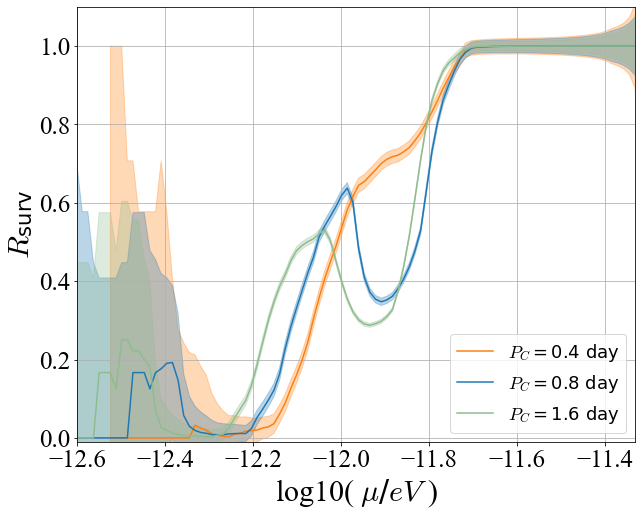

In [86]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.grid'] = True
plt.rcParams['image.cmap'] = 'gray'
plt.figure(figsize=(10,8))
plt.plot(np.log10(mulist),Ratelistd3,color='C1',label='$P_C=0.4$'+' day')
plt.fill_between( np.log10(mulist),y1=error31, y2=error32, color='C1', alpha=0.3)
plt.plot(np.log10(mulist),Ratelistd2,color='C0',label='$P_C=0.8$'+' day')
plt.fill_between( np.log10(mulist),y1=error21, y2=error22, color='C0', alpha=0.3)
plt.plot(np.log10(mulist),Ratelistd10,color='darkseagreen',label='$P_C=1.6$'+' day')
plt.fill_between( np.log10(mulist),y1=error101, y2=error102, color='darkseagreen', alpha=0.3)
plt.ylim((-0.01,1.1))
plt.xlim((-12.6,-11.33))
plt.ylabel('$R_{\mathrm{surv}}$',fontproperties=font1)
plt.xlabel('log10( '+'$\mu/eV$'+' )',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.legend(loc='lower right',fontsize=18)
plt.show()

<Figure size 720x576 with 0 Axes>

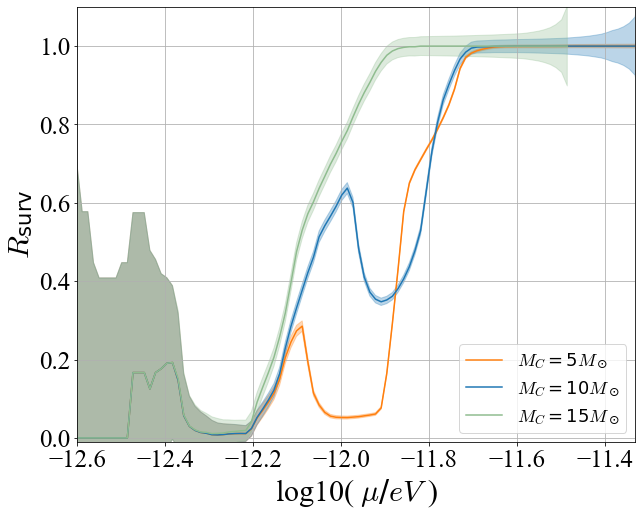

In [87]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.grid'] = True
plt.rcParams['image.cmap'] = 'gray'
plt.figure(figsize=(10,8))
plt.plot(np.log10(mulist),Ratelistd4,color='C1',label='$M_C=5M_\odot$')
plt.fill_between( np.log10(mulist),y1=error41, y2=error42, color='C1', alpha=0.3)
plt.plot(np.log10(mulist),Ratelistd2,color='C0',label='$M_C=10M_\odot$')
plt.fill_between( np.log10(mulist),y1=error21, y2=error22, color='C0', alpha=0.3)
plt.plot(np.log10(mulist),Ratelistd5,color='darkseagreen',label='$M_C=15M_\odot$')
plt.fill_between( np.log10(mulist),y1=error51, y2=error52, color='darkseagreen', alpha=0.3)
plt.ylim((-0.01,1.1))
plt.xlim((-12.6,-11.33))
plt.ylabel('$R_{\mathrm{surv}}$',fontproperties=font1)
plt.xlabel('log10( '+'$\mu/eV$'+' )',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.legend(loc='lower right',fontsize=18)
plt.show()

<Figure size 720x576 with 0 Axes>

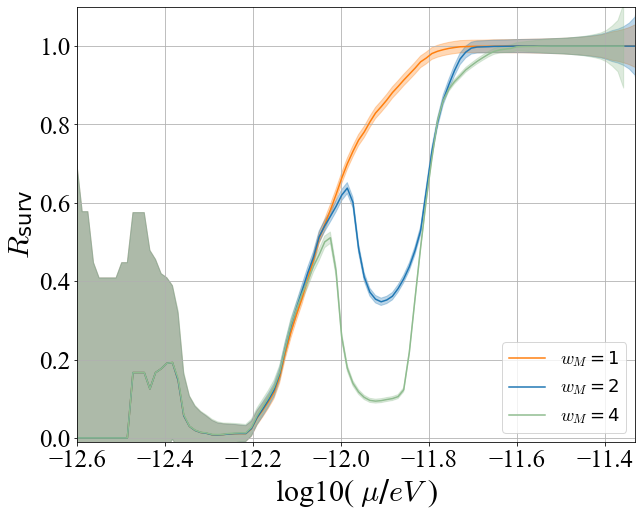

In [88]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.grid'] = True
plt.rcParams['image.cmap'] = 'gray'
plt.figure(figsize=(10,8))
plt.plot(np.log10(mulist),Ratelistd6,color='C1',label='$w_M=1$')
plt.fill_between( np.log10(mulist),y1=error61, y2=error62, color='C1', alpha=0.3)
plt.plot(np.log10(mulist),Ratelistd2,color='C0',label='$w_M=2$')
plt.fill_between( np.log10(mulist),y1=error21, y2=error22, color='C0', alpha=0.3)
plt.plot(np.log10(mulist),Ratelistd7,color='darkseagreen',label='$w_M=4$')
plt.fill_between( np.log10(mulist),y1=error71, y2=error72, color='darkseagreen', alpha=0.3)
plt.ylim((-0.01,1.1))
plt.xlim((-12.6,-11.33))
plt.ylabel('$R_{\mathrm{surv}}$',fontproperties=font1)
plt.xlabel('log10( '+'$\mu/eV$'+' )',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.legend(loc='lower right',fontsize=18)

plt.show()

<Figure size 720x576 with 0 Axes>

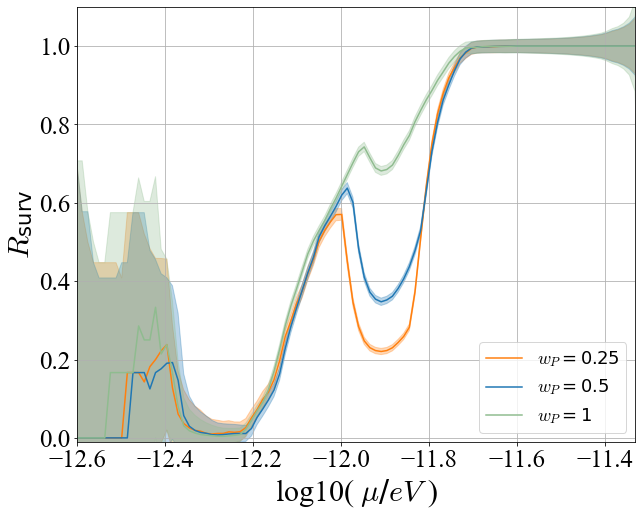

In [89]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.grid'] = True
plt.rcParams['image.cmap'] = 'gray'
plt.figure(figsize=(10,8))
plt.plot(np.log10(mulist),Ratelistd8,color='C1',label='$w_P=0.25$')
plt.fill_between( np.log10(mulist),y1=error81, y2=error82, color='C1', alpha=0.3)
plt.plot(np.log10(mulist),Ratelistd2,color='C0',label='$w_P=0.5$')
plt.fill_between( np.log10(mulist),y1=error21, y2=error22, color='C0', alpha=0.3)
plt.plot(np.log10(mulist),Ratelistd9,color='darkseagreen',label='$w_P=1$')
plt.fill_between( np.log10(mulist),y1=error91, y2=error92, color='darkseagreen', alpha=0.3)
plt.ylim((-0.01,1.1))
plt.xlim((-12.6,-11.33))
plt.ylabel('$R_{\mathrm{surv}}$',fontproperties=font1)
plt.xlabel('log10( '+'$\mu/eV$'+' )',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.legend(loc='lower right',fontsize=18)

plt.show()

# Graph of Spin Model 

<ipython-input-638-38698b21937a>:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1000))


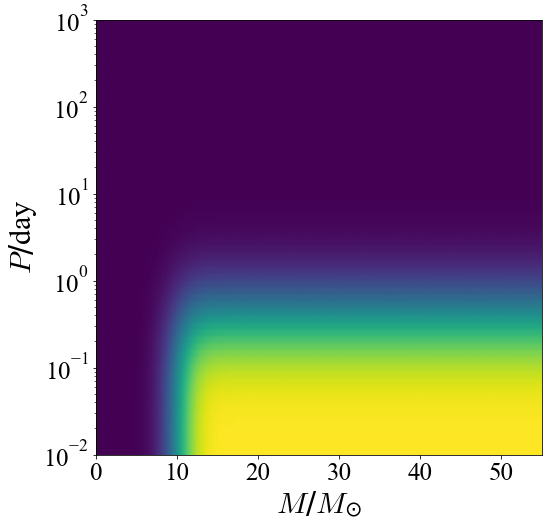

In [638]:
Z04=(1/4)* special.erfc(np.log10(10**Y/0.4)/(np.sqrt(2)*0.5)) * special.erfc((10-X)/(np.sqrt(2)*2))

plt.figure(figsize=(8,8))
plt.xlabel('$M/M_{\odot}$',size=30)
plt.ylabel('$P/$'+'day',size=30,fontproperties=font2)
ax=plt.pcolormesh(X, 10**Y, Z04,cmap='viridis',shading='gouraud')
plt.yscale('log')
plt.ylim((0,1000))
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
matplotlib.pyplot.grid(None)
plt.show()

<ipython-input-615-0675e7d101ef>:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1000))


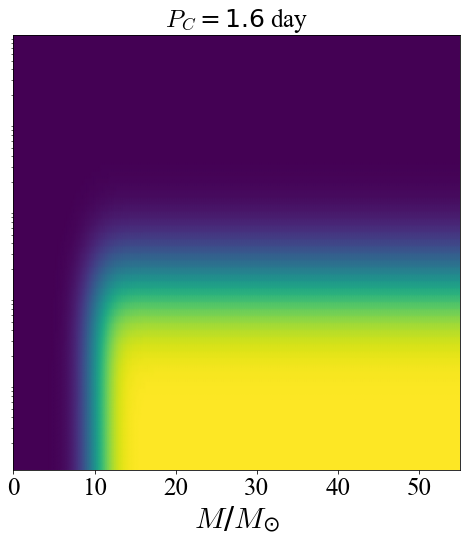

In [615]:
Z16=(1/4)* special.erfc(np.log10(10**Y/1.6)/(np.sqrt(2)*0.5)) * special.erfc((10-X)/(np.sqrt(2)*2))
plt.figure(figsize=(8,8))
plt.title('$P_C=1.6$'+' day',size=30,fontproperties=font2)
plt.xlabel('$M/M_{\odot}$',size=30)
ax=plt.pcolormesh(X, 10**Y, Z16,cmap='viridis',shading='gouraud')
plt.yscale('log')
plt.ylim((0,1000))
plt.xticks(fontproperties=font2)
plt.yticks([])
matplotlib.pyplot.grid(None)
plt.show()

<ipython-input-616-a3a616d2af12>:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1000))


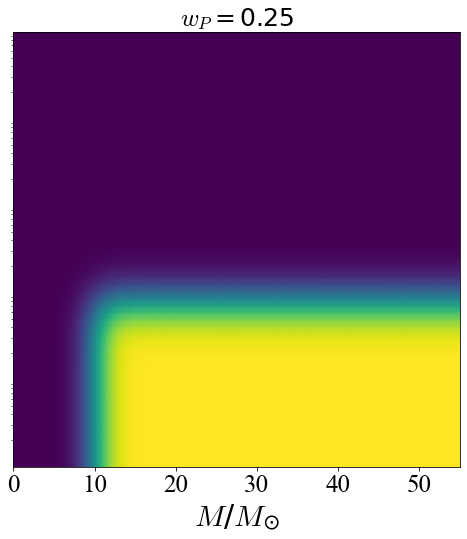

In [616]:
Z025=(1/4)* special.erfc(np.log10(10**Y/0.8)/(np.sqrt(2)*0.25)) * special.erfc((10-X)/(np.sqrt(2)*2))
plt.figure(figsize=(8,8))
plt.title('$w_P=0.25$',size=30,fontproperties=font2)
plt.xlabel('$M/M_{\odot}$',size=30)
ax=plt.pcolormesh(X, 10**Y, Z025,cmap='viridis',shading='gouraud')
plt.yscale('log')
plt.ylim((0,1000))
plt.xticks(fontproperties=font2)
plt.yticks([])
matplotlib.pyplot.grid(None)
plt.show()

<ipython-input-617-8b53d74ab380>:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1000))


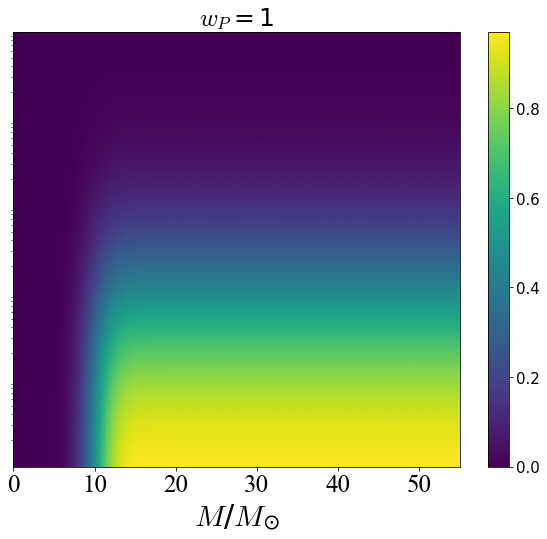

In [617]:
Z11=(1/4)* special.erfc(np.log10(10**Y/0.8)/(np.sqrt(2)*1)) * special.erfc((10-X)/(np.sqrt(2)*2))
plt.figure(figsize=(10,8))
plt.title('$w_P=1$',size=30,fontproperties=font2)
plt.xlabel('$M/M_{\odot}$',size=30)
ax=plt.pcolormesh(X, 10**Y, Z11,cmap='viridis',shading='gouraud')
cb1=plt.colorbar(ticks=np.linspace(0, 1,6))
cb1.ax.tick_params(labelsize=15)
plt.yscale('log')
plt.ylim((0,1000))
plt.xticks(fontproperties=font2)
plt.yticks([])
matplotlib.pyplot.grid(None)
plt.show()

<ipython-input-618-2ff897c01587>:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1000))


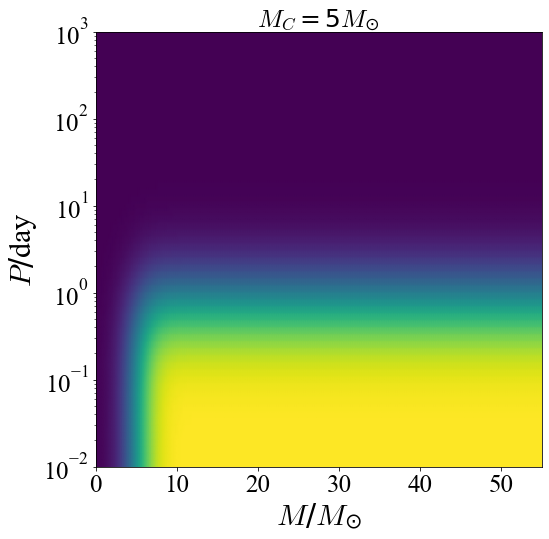

In [618]:
Z05=(1/4)* special.erfc(np.log10(10**Y/0.8)/(np.sqrt(2)*0.5)) * special.erfc((5-X)/(np.sqrt(2)*2))
plt.figure(figsize=(8,8))
plt.title('$M_C=5M_{\odot}$',size=30,fontproperties=font2)
plt.xlabel('$M/M_{\odot}$',size=30)
plt.ylabel('$P/$'+'day',size=30,fontproperties=font2)
ax=plt.pcolormesh(X, 10**Y, Z05,cmap='viridis',shading='gouraud')
plt.yscale('log')
plt.ylim((0,1000))
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
matplotlib.pyplot.grid(None)
plt.show()

<ipython-input-619-9b6fcc15f2c8>:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1000))


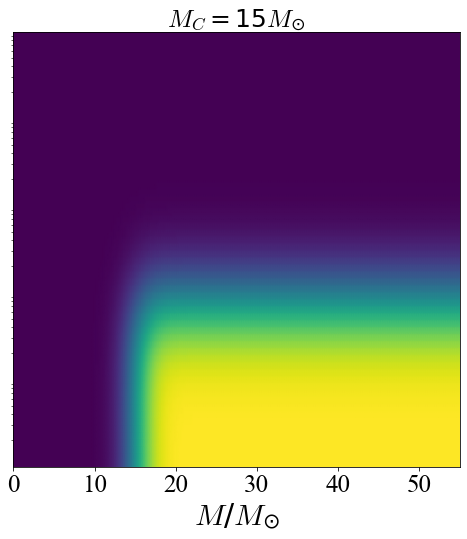

In [619]:
Z15=(1/4)* special.erfc(np.log10(10**Y/0.8)/(np.sqrt(2)*0.5)) * special.erfc((15-X)/(np.sqrt(2)*2))
plt.figure(figsize=(8,8))
plt.title('$M_C=15M_{\odot}$',size=30,fontproperties=font2)
plt.xlabel('$M/M_{\odot}$',size=30)
ax=plt.pcolormesh(X, 10**Y, Z15,cmap='viridis',shading='gouraud')
plt.yscale('log')
plt.ylim((0,1000))
plt.xticks(fontproperties=font2)
plt.yticks([])
matplotlib.pyplot.grid(None)
plt.show()

<ipython-input-620-b939b3e706d8>:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1000))


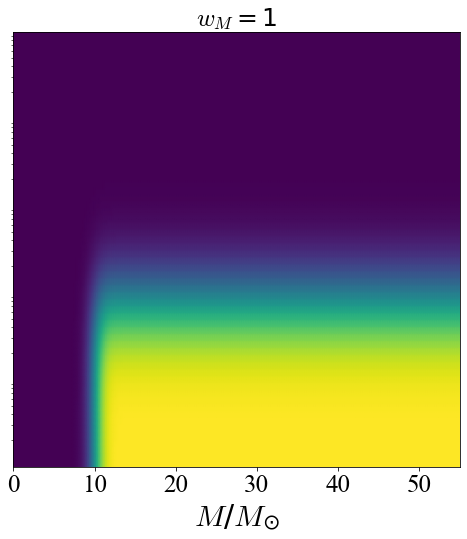

In [620]:
Z111=(1/4)* special.erfc(np.log10(10**Y/0.8)/(np.sqrt(2)*0.5)) * special.erfc((10-X)/(np.sqrt(2)*1))
plt.figure(figsize=(8,8))
plt.title('$w_M=1$',size=30,fontproperties=font2)
plt.xlabel('$M/M_{\odot}$',size=30)
ax=plt.pcolormesh(X, 10**Y, Z111,cmap='viridis',shading='gouraud')
plt.yscale('log')
plt.ylim((0,1000))
plt.xticks(fontproperties=font2)
plt.yticks([])
matplotlib.pyplot.grid(None)
plt.show()

<ipython-input-621-54eda96c3bf9>:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1000))


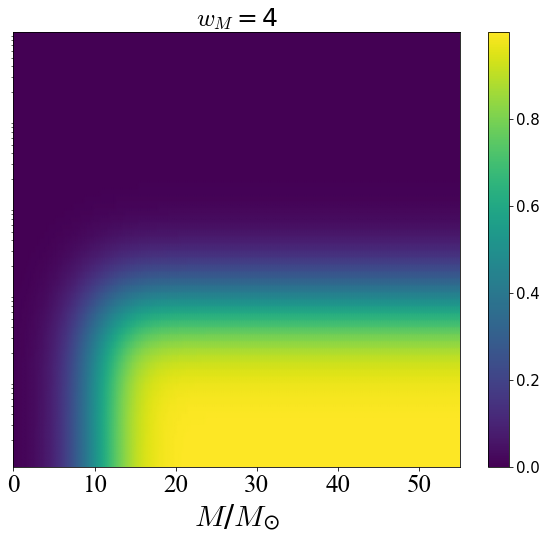

In [621]:
Z4=(1/4)* special.erfc(np.log10(10**Y/0.8)/(np.sqrt(2)*0.5)) * special.erfc((10-X)/(np.sqrt(2)*4))
plt.figure(figsize=(10,8))
plt.title('$w_M=4$',size=30,fontproperties=font2)
plt.xlabel('$M/M_{\odot}$',size=30)
ax=plt.pcolormesh(X, 10**Y, Z4,cmap='viridis',shading='gouraud')
cb1=plt.colorbar(ticks=np.linspace(0, 1,6))
cb1.ax.tick_params(labelsize=15)
plt.yscale('log')
plt.ylim((0,1000))
plt.xticks(fontproperties=font2)
plt.yticks([])
matplotlib.pyplot.grid(None)
plt.show()

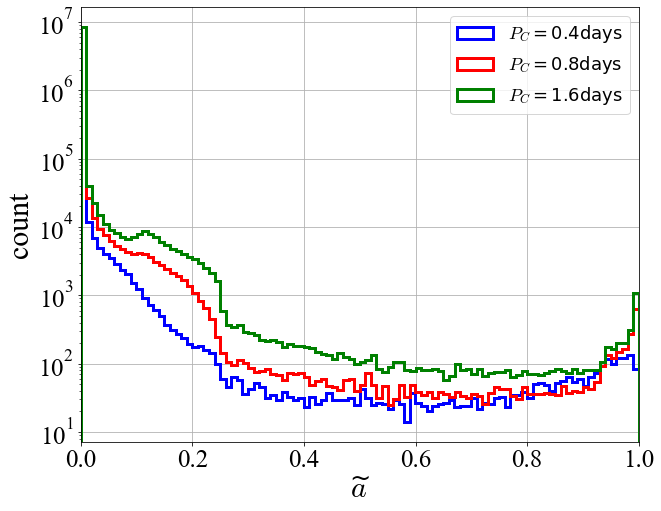

In [109]:
#plt.title('BH Spin for PT Model')
atPT=ourspin(T,Mb,0.8,10,0.5,2)
atPT1=ourspin(T,Mb,0.4,10,0.5,2)
atPT2=ourspin(T,Mb,1.6,10,0.5,2)
plt.figure(figsize=(10,8))
plt.xlim((0,1))
plt.yscale('log')
plt.hist(atPT1,lw=3,bins=100,edgecolor='blue',histtype='step',label='$P_C=0.4$'+'days')
plt.hist(atPT,lw=3,bins=100,edgecolor='red',histtype='step',label='$P_C=0.8$'+'days')
plt.hist(atPT2,lw=3,bins=100,edgecolor='green',histtype='step',label='$P_C=1.6$'+'days')
plt.grid(True)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.xlabel('$\widetilde{a}$',fontproperties=font1)
plt.ylabel('count',fontproperties=font1)
plt.legend(fontsize=18)
plt.show()

Different cutoff of alpha 

In [88]:
#Survival Rate Function Using Dask
def RateOfSurvive_322d1(BHspin,BHmass,mumass,Massratio,ecc,semimajor,cut):

    #mumass should be in eV
    
    #superradiance rate bigger than one over the threashold time (Return True or False list)
    sel_cand_1 = GAMMA_322(at=BHspin,Mb=BHmass,mu=mumass,verbose=False)-cut>0
    #alpha<0.8 (Return another True or False list)
    sel_cand_2 = G*BHmass * Msun * mumass *eVtokg /(c * hbar )<0.2
    #Only two condition True together can be True (Return True or False list)
    sel_part_322 = sel_cand_1 * sel_cand_2
    #Delta Gamma<Gamma (Return True or False list)
    sel_surv_322=-DELTA_GAMMA_ACR_322(e=ecc,Mb=BHmass,q=Massratio,a=semimajor,at=BHspin,mu = mumass,verbose=False)/GAMMA_322(at=BHspin,Mb=BHmass,mu=mumass,verbose=False)<1
    
    #Survival for 322 (Need Delta Gamma<Gamma and it should be a participant)
    SurviveOrNot322 = sel_part_322 * sel_surv_322
    
    return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()


#Error Bar Function Using Dask
def ErrorBar_322d1(BHspin,BHmass,mumass,Massratio,ecc,semimajor,cut):

    #mumass should be in eV
    sel_cand_1 = GAMMA_322(at=BHspin,Mb=BHmass,mu=mumass,verbose=False)-cut>0 
    sel_cand_2 = G*BHmass * Msun * mumass *eVtokg /(c * hbar )<0.2
    
    sel_part_322 = sel_cand_1 * sel_cand_2
            
    errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
    
    return errorbar

In [89]:
Ratelistd1=[RateOfSurvive_322d1(BHspin=Daskat,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord1=[ErrorBar_322d1(BHspin=Daskat,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]
error11=np.array(Ratelistd1)+(np.array(Errord1))
error21=np.array(Ratelistd1)-(np.array(Errord1))

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a,

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a,

<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a,

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a,

<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:18: RuntimeWarning: invalid value encountered in long_scalars
  return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a,

<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute

<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14

<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14

<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14d6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
/home/hzhuav/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
<ipython-input-88-7e19f2de14

<Figure size 720x576 with 0 Axes>

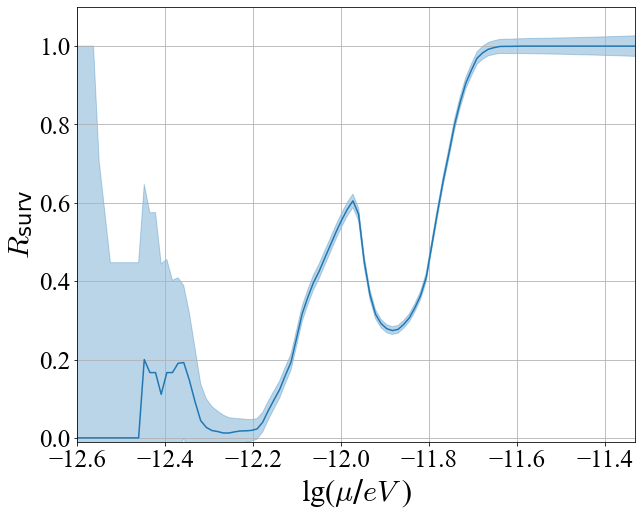

In [87]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.grid'] = True
plt.rcParams['image.cmap'] = 'gray'
plt.figure(figsize=(10,8))
plt.plot(np.log10(mulist),Ratelistd1,color='C0')
plt.fill_between( np.log10(mulist),y1=error11, y2=error21, color='C0', alpha=0.3)
plt.ylim((-0.01,1.1))
plt.xlim((-12.6,-11.33))
plt.ylabel('$R_{\mathrm{surv}}$',fontproperties=font1)
plt.xlabel('lg('+'$\mu/eV$'+' )',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

<Figure size 720x576 with 0 Axes>

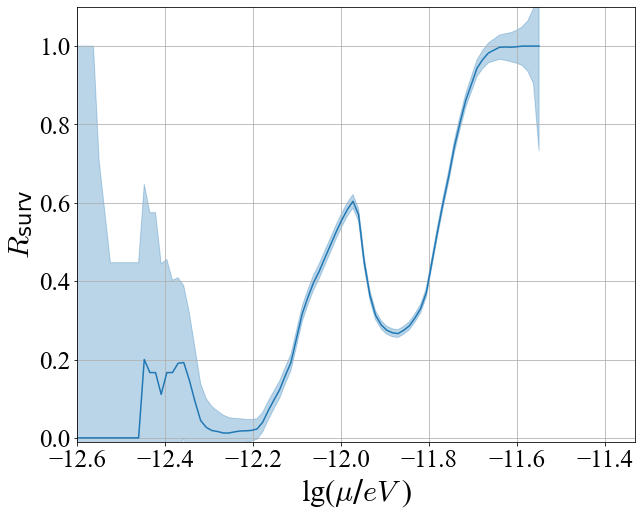

In [90]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.grid'] = True
plt.rcParams['image.cmap'] = 'gray'
plt.figure(figsize=(10,8))
plt.plot(np.log10(mulist),Ratelistd1,color='C0')
plt.fill_between( np.log10(mulist),y1=error11, y2=error21, color='C0', alpha=0.3)
plt.ylim((-0.01,1.1))
plt.xlim((-12.6,-11.33))
plt.ylabel('$R_{\mathrm{surv}}$',fontproperties=font1)
plt.xlabel('lg('+'$\mu/eV$'+' )',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

In [6]:
0.1/(G*(10**(-5))  *eVtokg /(c * hbar ))

2.657187204535261e+24

In [8]:
0.01/(G*(10**(15))  *eVtokg /(c * hbar ))

2657.187204535261

In [5]:
0.01/(G* (10**(-21)) * Msun *eVtokg /(c * hbar ))

1336337746.3244686

In [6]:
0.1/(G* (10**(-21)) * Msun *eVtokg /(c * hbar ))

13363377463.244686

In [4]:
0.1/(G*(10**(7))  *eVtokg /(c * hbar ))

2657187204535.262

In [6]:
GAMMA_211(1,10**7/Msun,mu = 125e9,verbose=False)

922337.2900850866